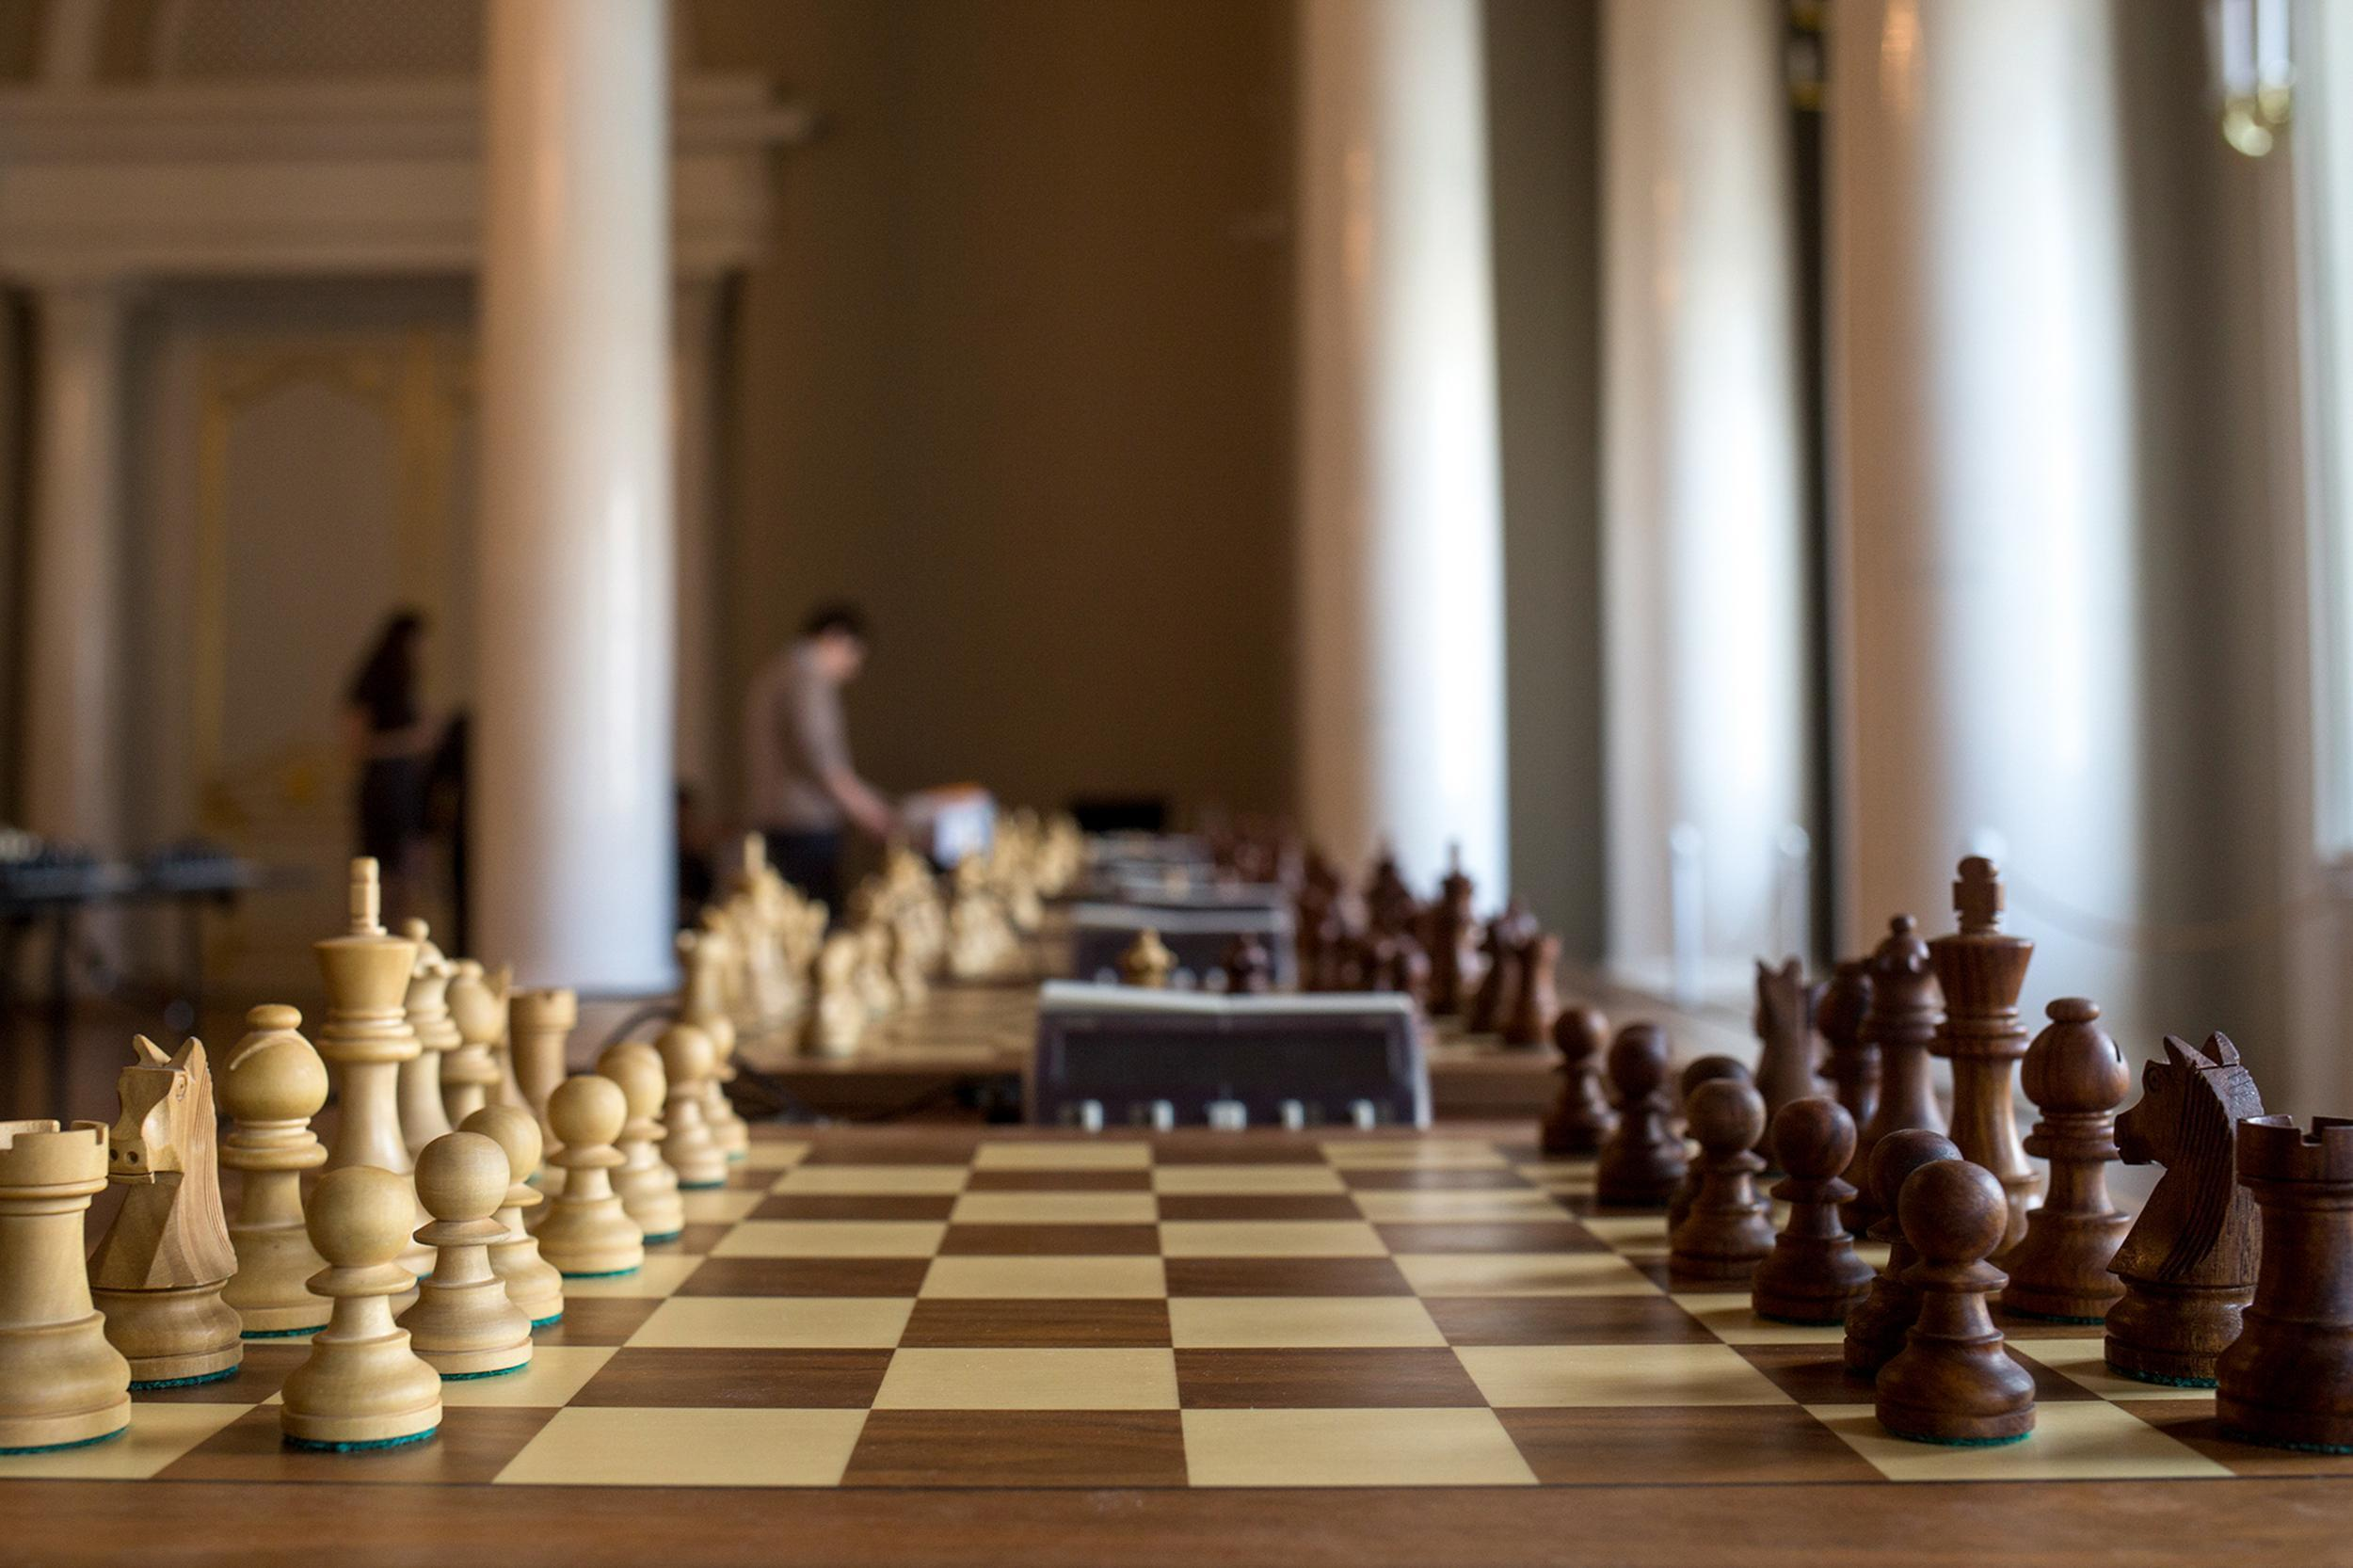

## Introduction

Based on [analyzing-chess-dataset](https://www.kaggle.com/code/fabrizioferrari73/analyzing-chess-dataset), in this project we want to do some beginner analysis on the [Top 20 chess players 2000-2021](https://www.kaggle.com/datasets/medaxone/top-20-chess-ratings-20002021) dataset and answer the following questions:

1. Who had the highest ELO? In which year?
1. What's the average of the top 20 ELOs?
1. What's the time trend for the average ELO?
1. What's the time trend of each player's ELO?
1. What's the minimum ELO of a player who ever appeared in top 20 ELOs? Who is this?
1. What's the average age of the players who were in the top 20 ELOs? What's the time trend for the average age?
1. Who appeared most times in the top 20 ELOs?
1. What's the average age of peak performance of top 10 players?

## Preparation

Let’s get started by installing and importing the necessary packages.

In [1]:
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing Libraries 
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Importing the data

In [3]:
df = pd.read_csv('/kaggle/input/top-20-chess-ratings-20002021/Chess.csv')

Now that we've loaded our data, let's take a look at our dataset:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Position (in January)  440 non-null    int64 
 1   Name                   440 non-null    object
 2   ELO                    440 non-null    int64 
 3   Date                   440 non-null    object
 4   Age                    440 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 17.3+ KB


In [5]:
df.head()

,Position (in January),Name,ELO,Date,Age
0,1,Carlsen,2862,2021 Jan,30
1,2,Caruana,2823,2021 Jan,28
2,3,Ding Liren,2791,2021 Jan,28
3,4,Nepomniachtchi,2789,2021 Jan,30
4,5,Vachier-Lagrave,2784,2021 Jan,30


### Adding Year Column

We have `Date` column, which contains the year and the month of the record, but there isn't any `Year` column in the dataset. Having `Year` column helps us calculating time trends in the future questions so let's add it to our dataset.

Forst let's take a look into our `Date` column:

In [6]:
df['Date']

0      2021 Jan
1      2021 Jan
2      2021 Jan
3      2021 Jan
4      2021 Jan
         ...   
435    2000 Jan
436    2000 Jan
437    2000 Jan
438    2000 Jan
439    2000 Jan
Name: Date, Length: 440, dtype: object

To extract the year from our date, we'll remove all characters after year using regex and the replace function. After that, we cast the type of Date column to integer.

In Regex, `.` matches any single character (whitespace, number, alphabet, except for the newline character) and `+` matches one or more occurrences.

For example if we take `Chess Game` as an input:

- `Che.+a`matches `Chess Ga`
- `Che.+` matches `Chess Game`. Every character from C to the last character
- `.+` matches `Chess Game` Or in our example it matches `2021 Jan`
- ` .+` matches ` Game` Or in our example it matches ` Jan`

So in our case, we want to match the year, so use ` .+` to match whatever comes after the year, and replace it with an empty string:

In [7]:
df['Year'] = df['Date'].replace(' .+', '', regex=True).astype(int)

## 1. Who had the highest ELO? In which year?

We use the `nlargest(n, columns)` method to get the first `n` rows with the largest value of a specefic column or columns, in descending order.

In [8]:
df.nlargest(1, 'ELO')

,Position (in January),Name,ELO,Date,Age,Year
20,1,Carlsen,2872,2020 Jan,29,2020


## 2. What's the average of the top 20 ELOs?

In order to select a specefic column, we use square brackets`[]` with the column name of the column of interest, it'll be display just that column of the selected records.

In [9]:
elo_column = df.nlargest(20, 'ELO')['ELO']
elo_column

20     2872
140    2872
0      2862
120    2862
160    2861
420    2851
400    2849
360    2847
100    2844
80     2840
380    2838
40     2835
180    2835
60     2834
340    2831
41     2828
81     2827
1      2823
21     2822
121    2820
Name: ELO, dtype: int64

In [10]:
average_20_elo = df.nlargest(20, 'ELO')['ELO'].mean()
# we can write in another way like => df.ELO.nlargest(20).mean()
print('The average ELO of the top 20 ELOs position is: %s'%average_20_elo)

The average ELO of the top 20 ELOs position is: 2842.65


##  3. What's the time trend for the average ELO?

We can answer this by using for loop over all years, calculate the average ELO for each year and plot it. Note that `df.Column` is the same as `df['Column']`. We'll also solve this question in a more efficient way using `groupby` afterwords.

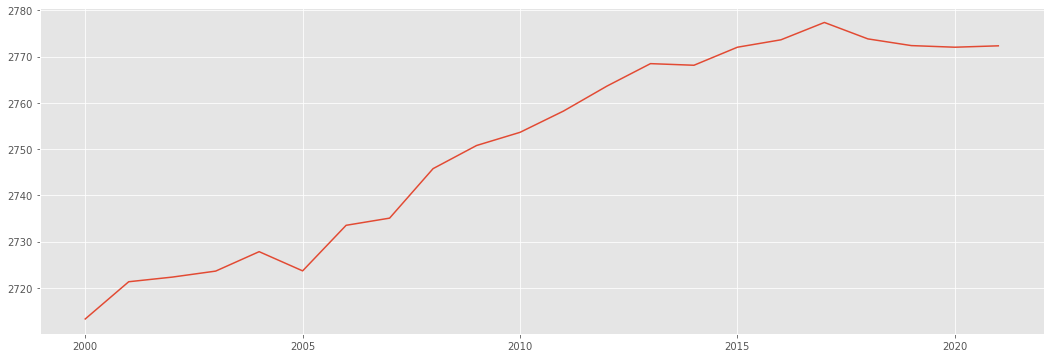

In [11]:
years = sorted(df.Year.unique())

x = []
y = []

for year in years:
    year_rows = df[df.Year == year]
    average_elo = year_rows.ELO.mean()
    x.append(year)
    y.append(average_elo)

plt.figure(figsize=(18, 6))
plt.plot(x, y)

`dataframe.groupby()` function is used to split the data into groups based on some criteria. It'll return a list of lists with keys and rows.

Let's take a look at an example:

In [12]:
df_groupby_year = df.groupby('Year')['ELO'].apply(list)
df_groupby_year

Year
2000    [2851, 2769, 2758, 2751, 2748, 2725, 2715, 270...
2001    [2849, 2790, 2772, 2746, 2745, 2745, 2718, 271...
2002    [2838, 2809, 2757, 2742, 2742, 2739, 2727, 271...
2003    [2847, 2809, 2753, 2743, 2736, 2734, 2734, 272...
2004    [2831, 2777, 2766, 2747, 2736, 2735, 2732, 272...
2005    [2804, 2786, 2757, 2754, 2749, 2741, 2741, 273...
2006    [2812, 2801, 2792, 2765, 2752, 2741, 2740, 272...
2007    [2783, 2779, 2766, 2754, 2750, 2749, 2744, 274...
2008    [2799, 2799, 2780, 2765, 2763, 2760, 2755, 275...
2009    [2796, 2791, 2779, 2776, 2771, 2761, 2760, 275...
2010    [2810, 2805, 2790, 2788, 2781, 2761, 2759, 274...
2011    [2814, 2810, 2805, 2784, 2776, 2775, 2773, 277...
2012    [2835, 2805, 2801, 2799, 2773, 2770, 2769, 276...
2013    [2861, 2810, 2802, 2793, 2781, 2780, 2772, 277...
2014    [2872, 2812, 2789, 2787, 2785, 2782, 2777, 277...
2015    [2862, 2820, 2810, 2800, 2797, 2797, 2784, 278...
2016    [2844, 2801, 2798, 2792, 2787, 2787, 2785, 278...
2017    [

In this example, we have lists with `year` as their keys and `list of ELOs`.

We can also do aggregation on the grouped data. The whole process can be broken down into this:

```
dataframe.groupby(['grouping column(s)'])['output column(s)'].aggregation()
|____________________________________| |________________________________|
                   |                                    |
        grouper object (split)            aggregation (apply & combine)
```

And now to use `groupby` to answer our question:

Text(0.5, 1.0, 'Time Trend For Average ELO')

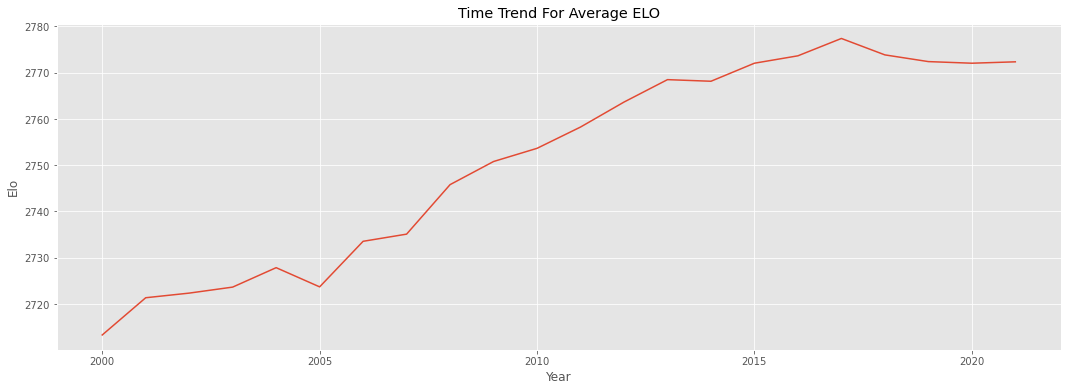

In [13]:
plt.figure(figsize=(18, 6))
plt.plot(np.sort(df['Year'].unique()), df.groupby('Year')['ELO'].mean())
plt.xlabel('Year')
plt.ylabel('Elo')
plt.title('Time Trend For Average ELO')

As you can see, the result is the same as the previous method, and it's been achieved in a more efficient way.

## 4. What's the time trend of each player's ELO?


Assuming the dataset doesn't have players with the same name, lets extract the unique list of player names first:

In [14]:
player_names = df.Name.unique()
player_names

array(['Carlsen', 'Caruana', 'Ding Liren', 'Nepomniachtchi',
       'Vachier-Lagrave', 'Aronian', 'Grischuk', 'Mamedyarov', 'So',
       'Radjabov', 'Giri', 'Wang Hao', 'Rapport', 'Dominguez Perez',
       'Karjakin', 'Anand', 'Kramnik', 'Firouzja', 'Duda', 'Nakamura',
       'Vitiugov', 'Topalov', 'Yu Yangyi', 'Navara', 'Svidler',
       'Harikrishna', 'Eljanov', 'Ivanchuk', 'Adams', 'Wojtaszek',
       'Li Chao', 'Gelfand', 'Andreikin', 'Bacrot', 'Morozevich',
       'Kamsky', 'Gashimov', 'Leko', 'Jakovenko', 'Tomashevsky',
       'Ponomariov', 'Wang Yue', 'Shirov', 'Movsesian S', 'Cheparinov',
       'Alekseev', 'Polgar J', 'Akopian', 'Kasparov', 'Bareev', 'Dreev',
       'Vallejo Pons', 'Sokolov Ivan', 'Volokitin', 'Short', 'Malakhov',
       'Khalifman', 'Karpov', 'Smirin', 'Van Wely', 'Kasimdzhanov',
       'Lautier', 'Gurevich Mikhail', 'Bologan', 'Fedorov', 'Georgiev',
       'Almasi', 'Azmaiparashvili'], dtype=object)

Now we can loop over the list of player names and plot the ELOs for each player:

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


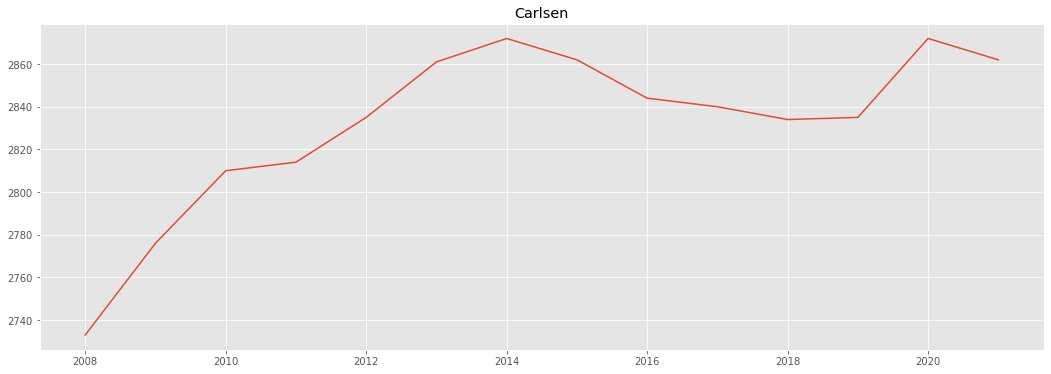

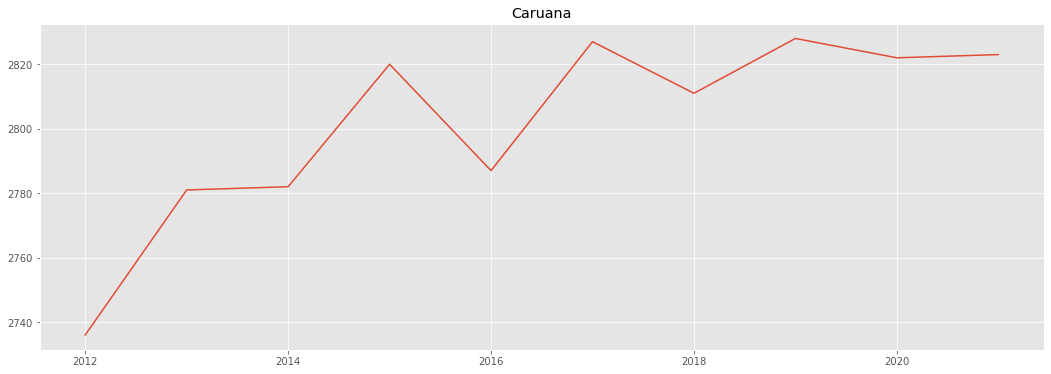

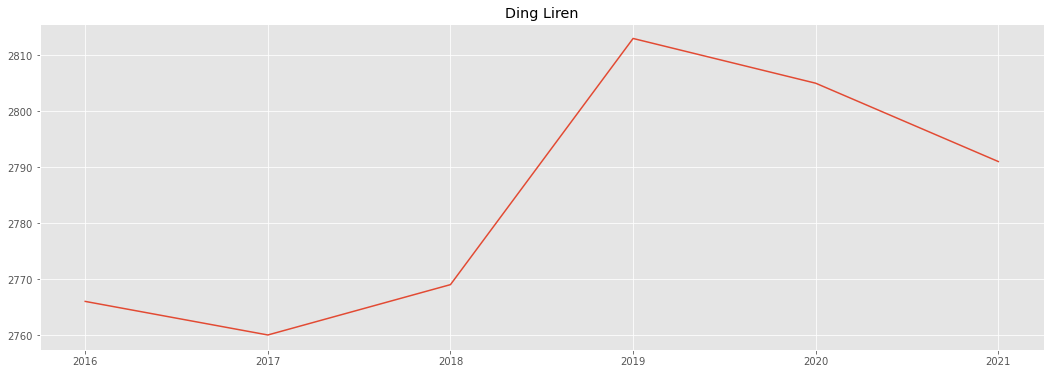

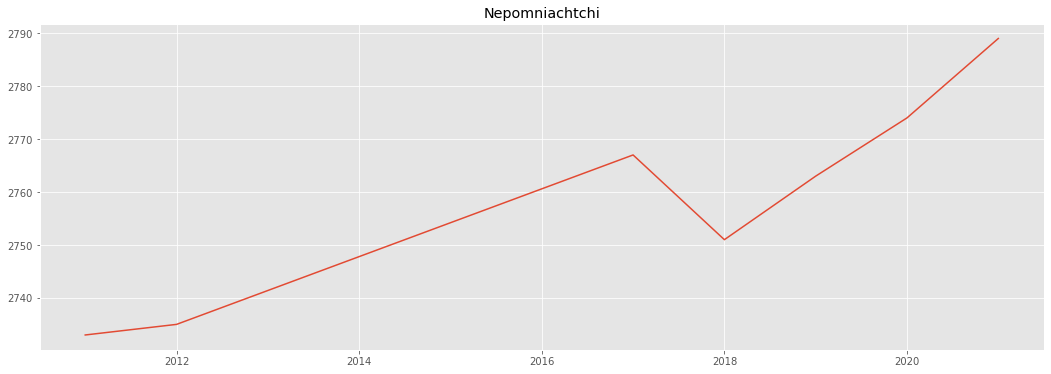

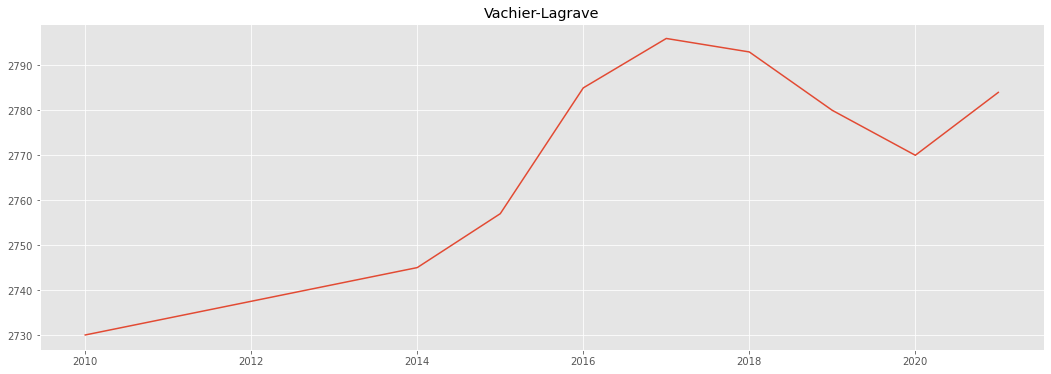

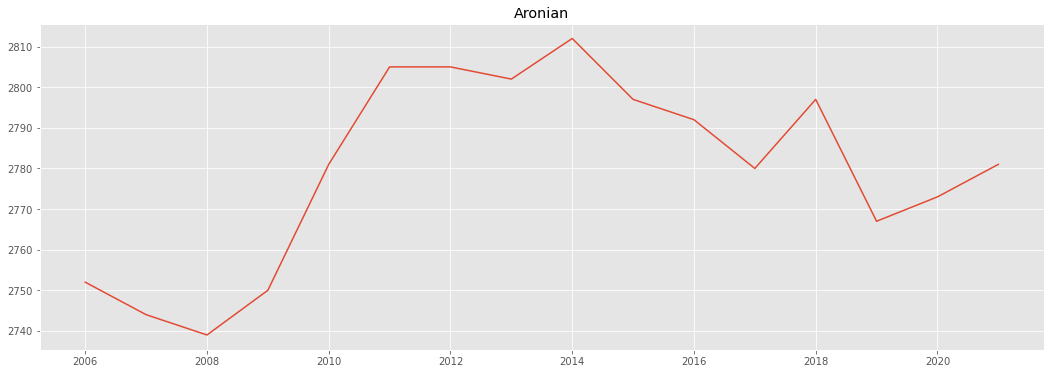

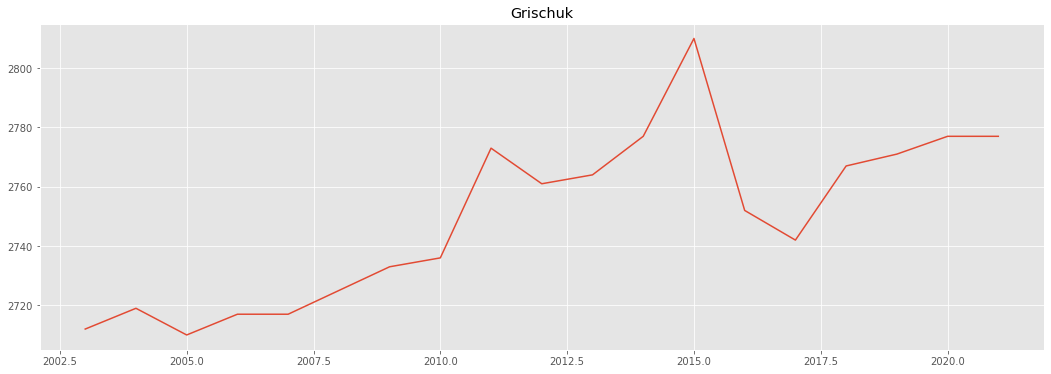

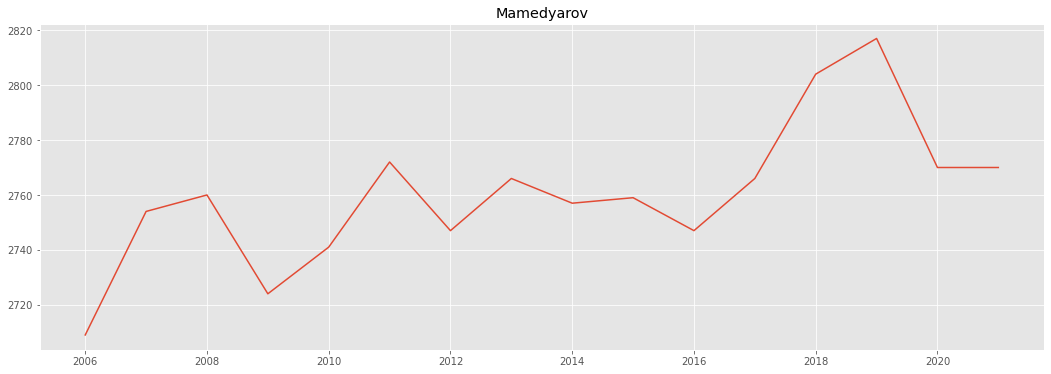

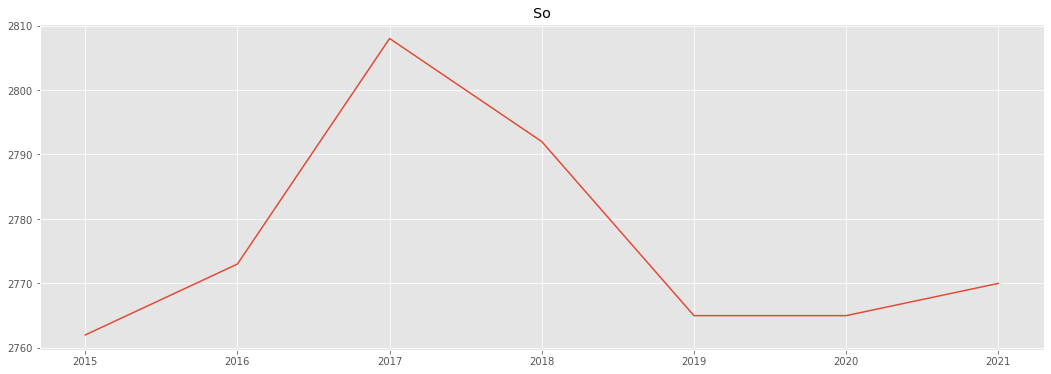

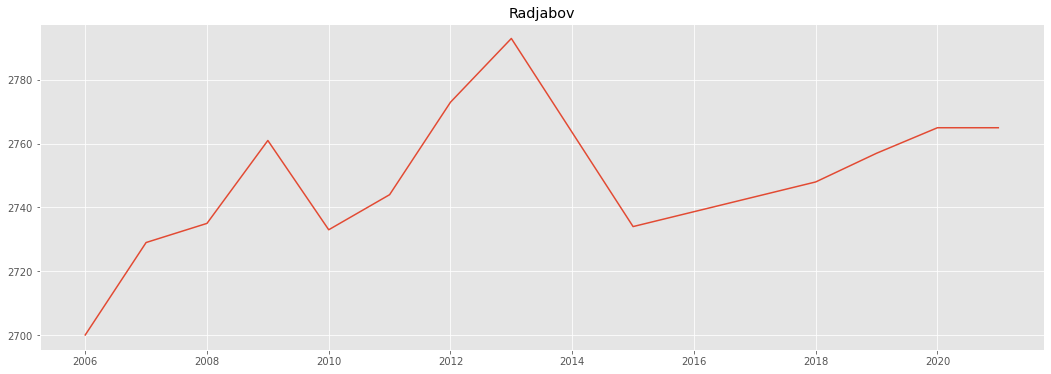

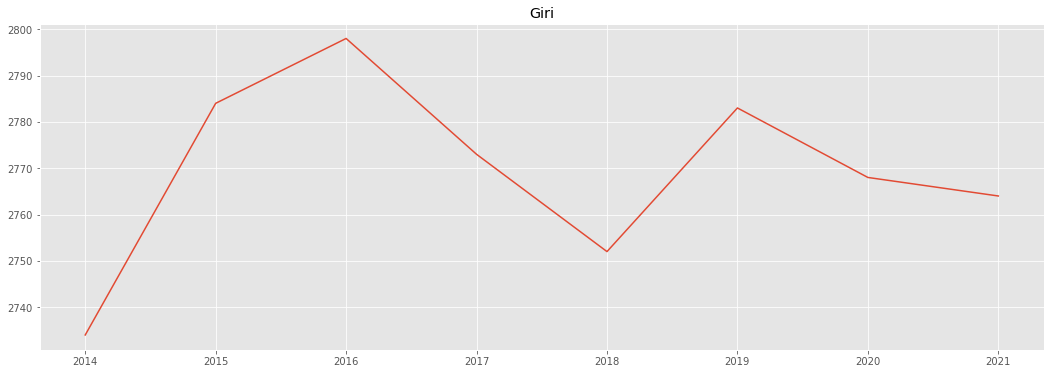

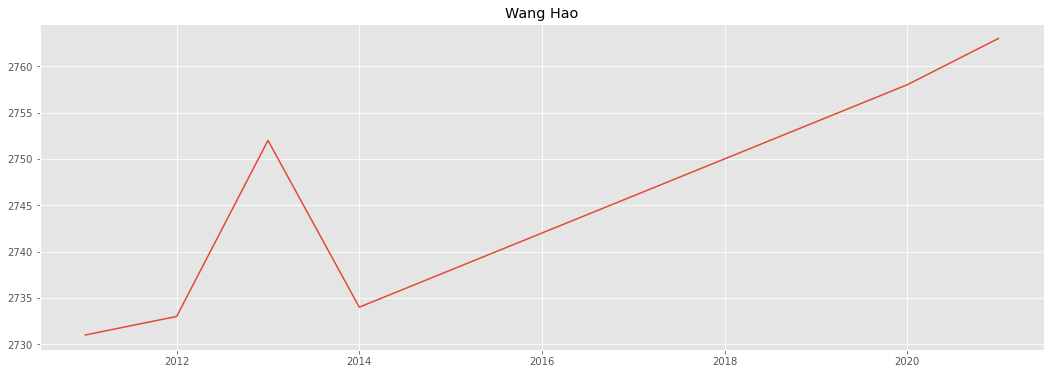

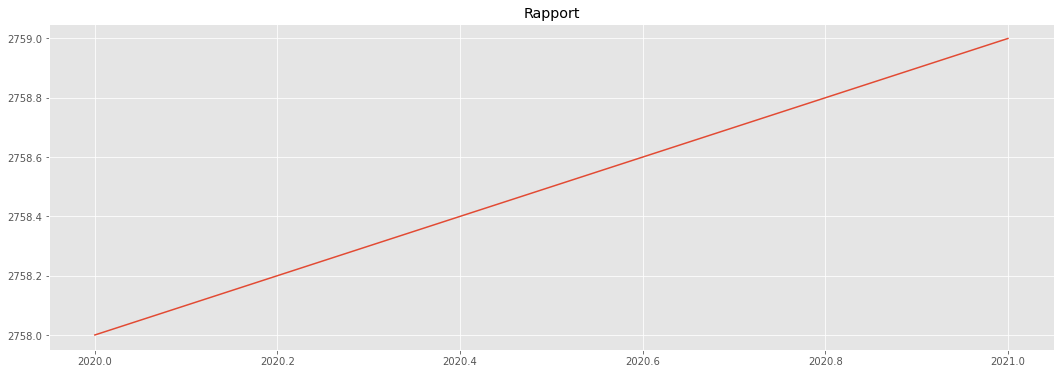

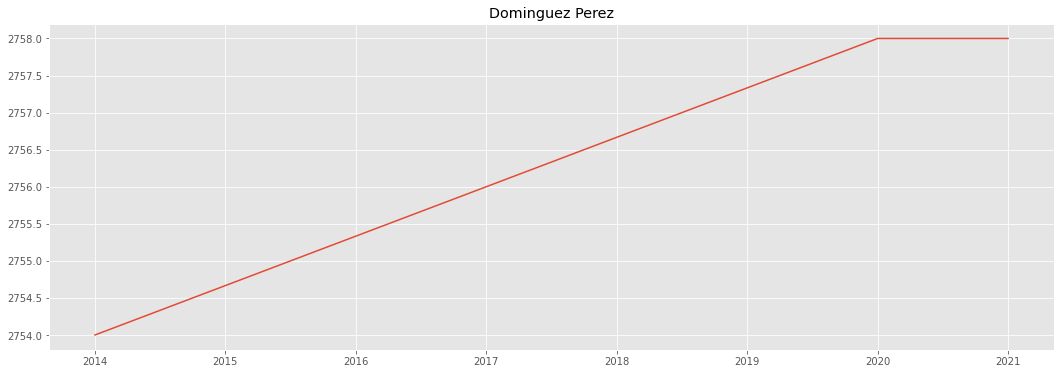

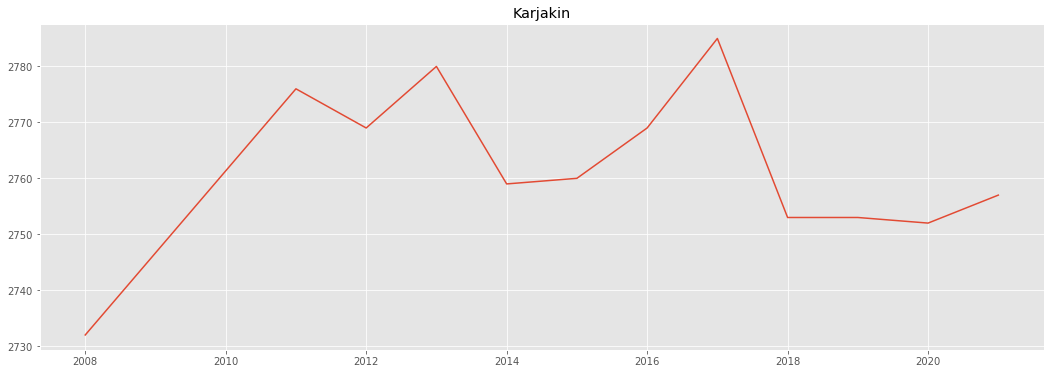

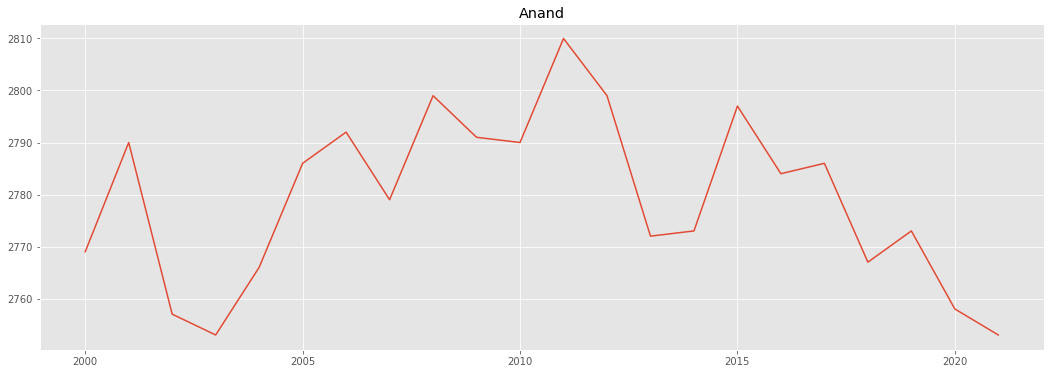

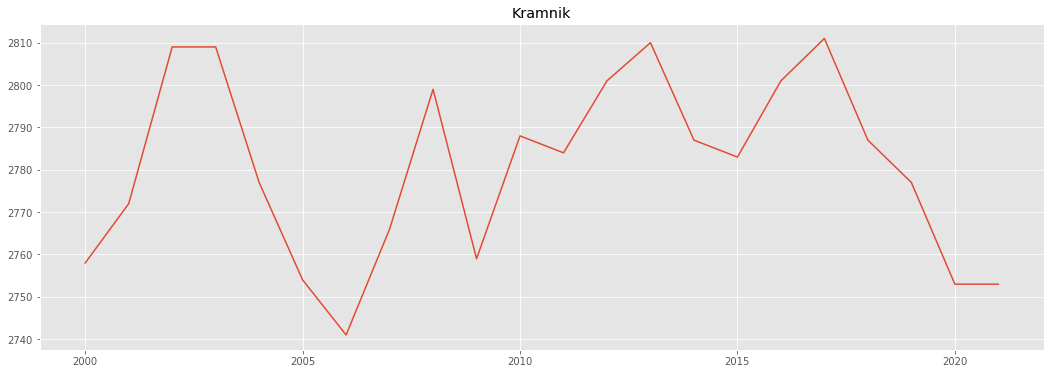

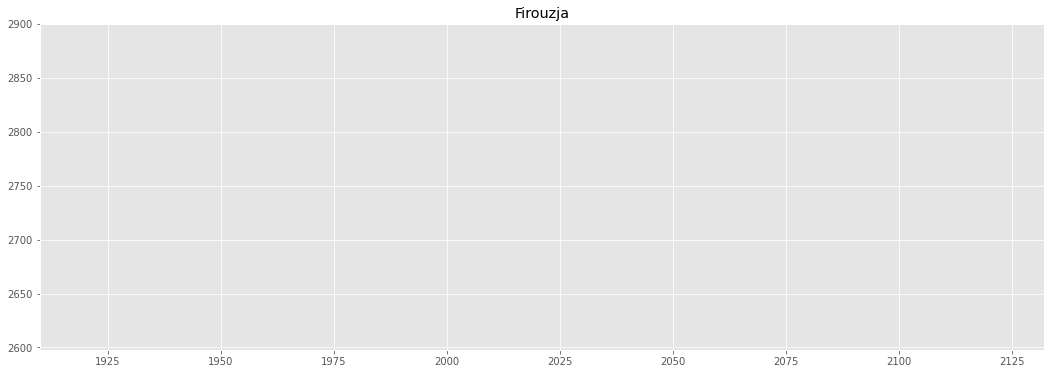

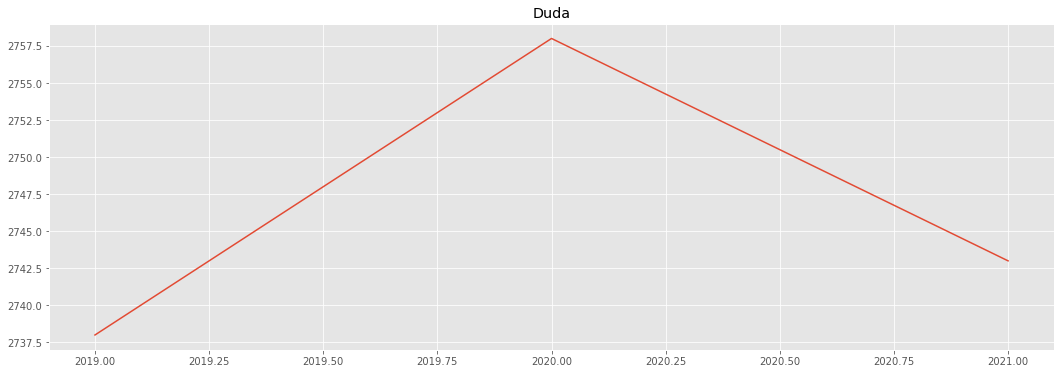

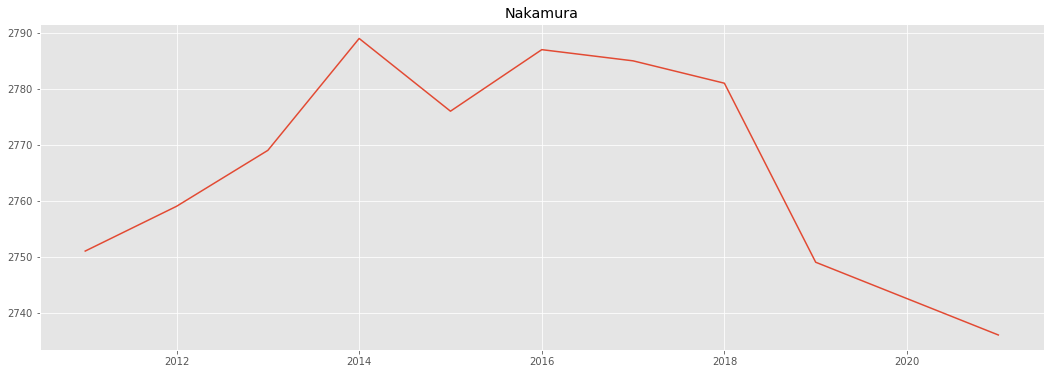

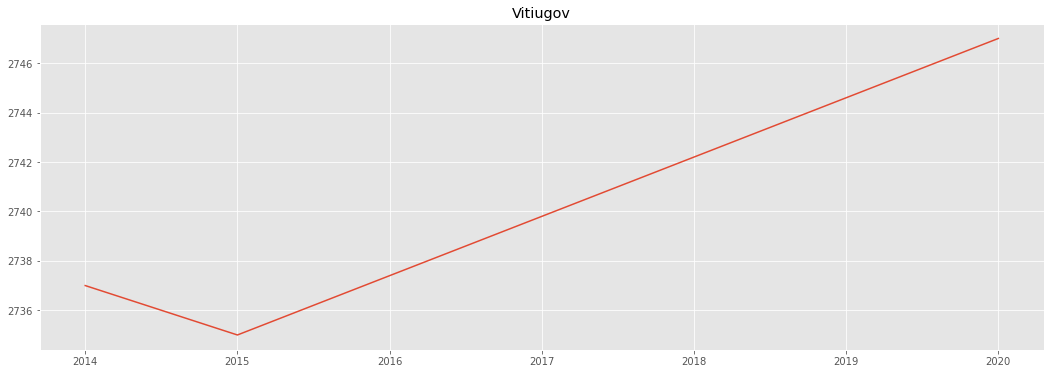

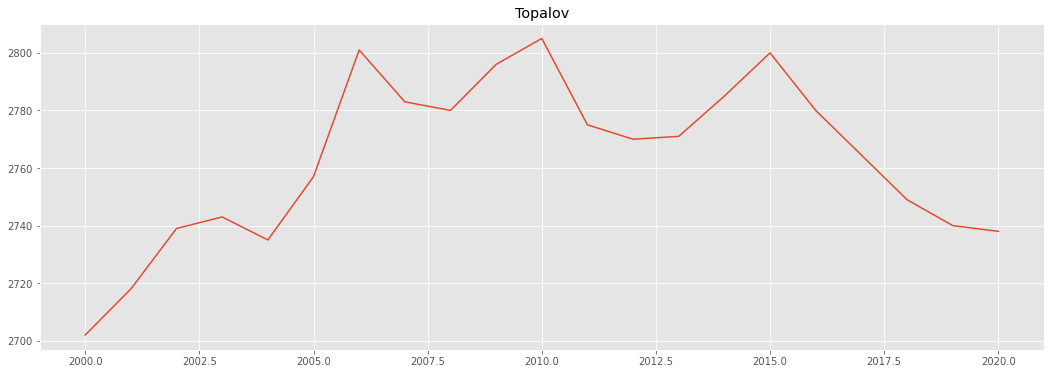

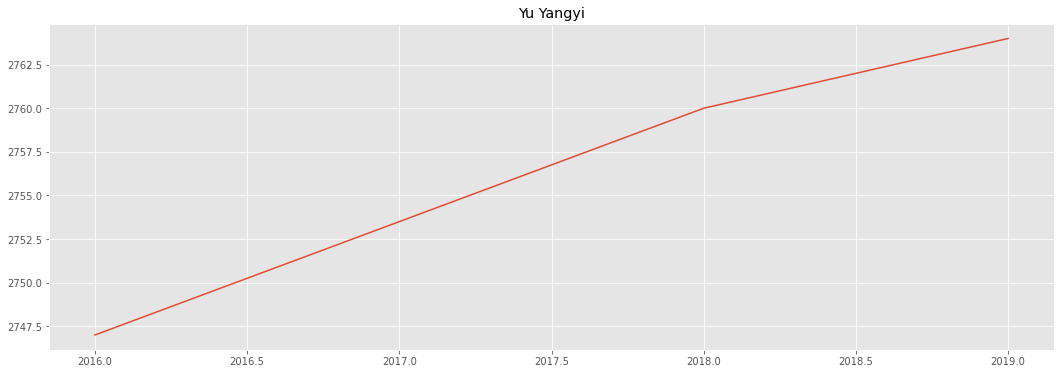

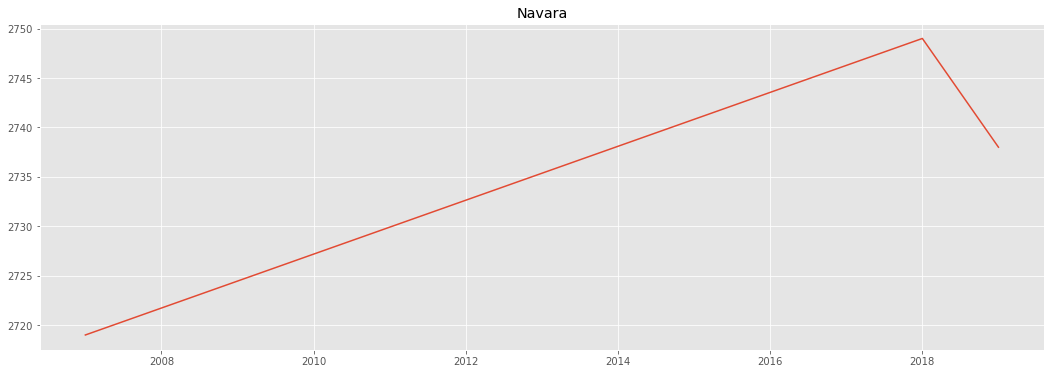

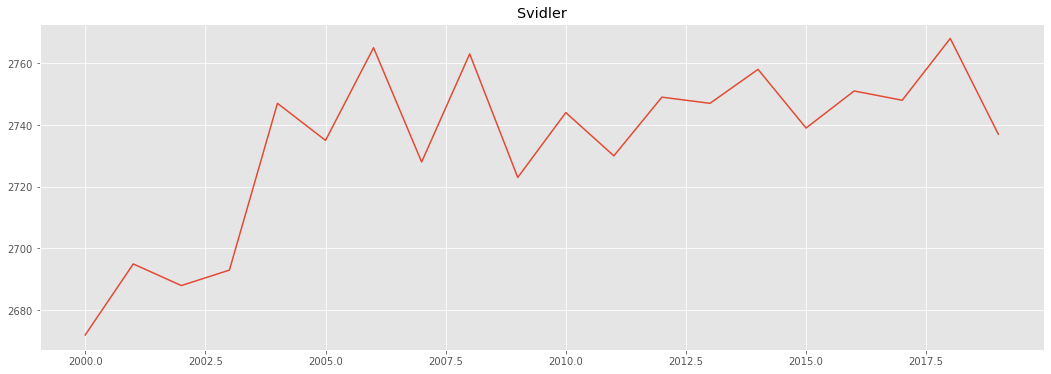

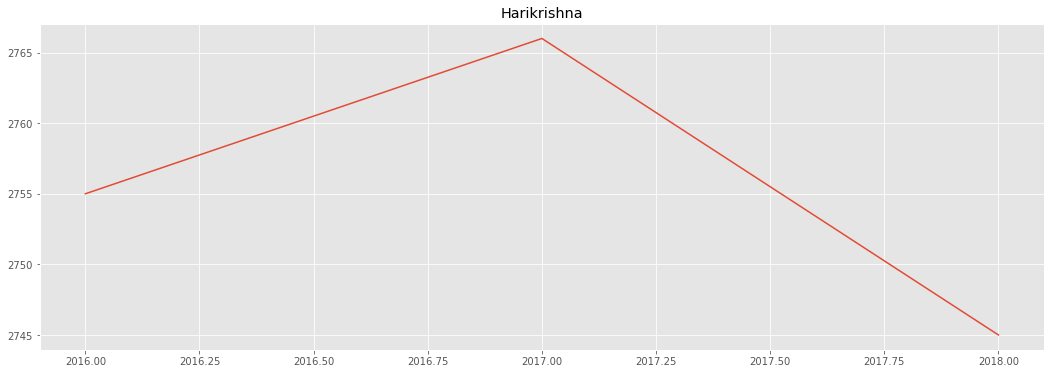

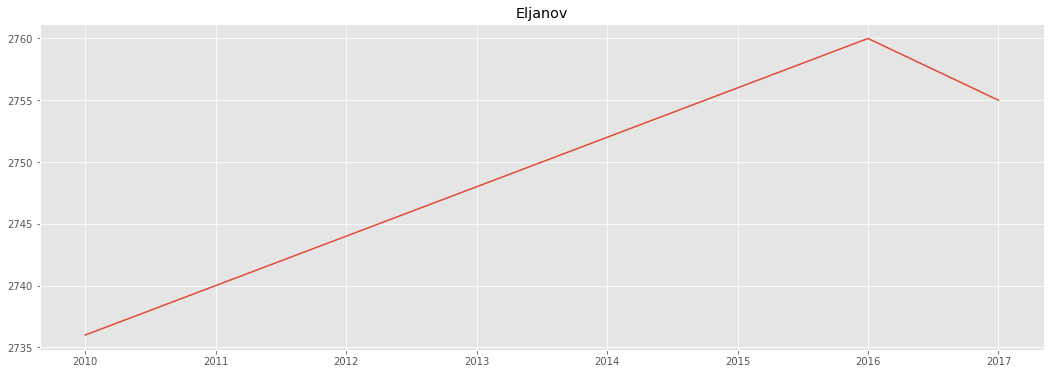

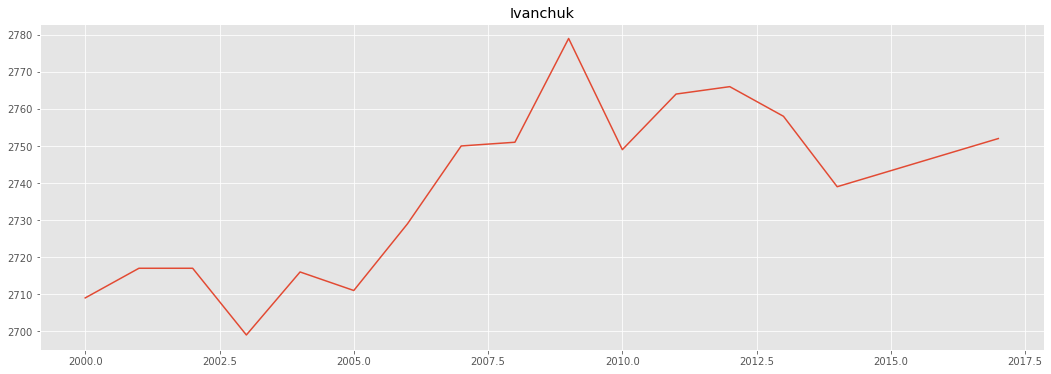

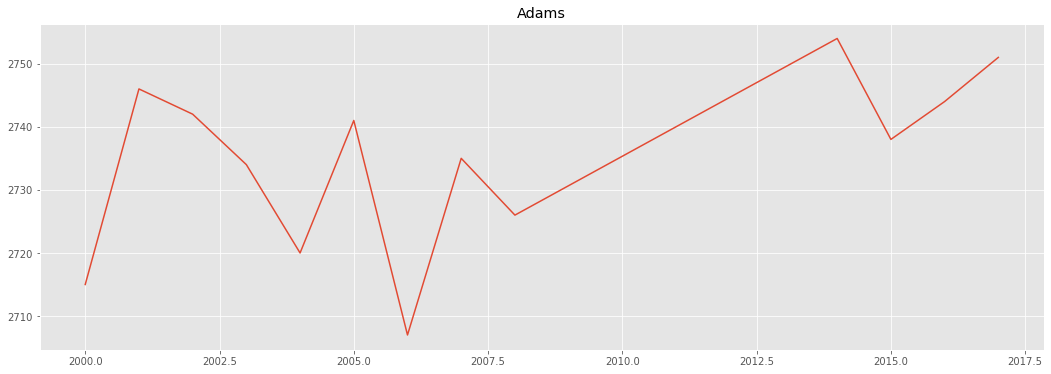

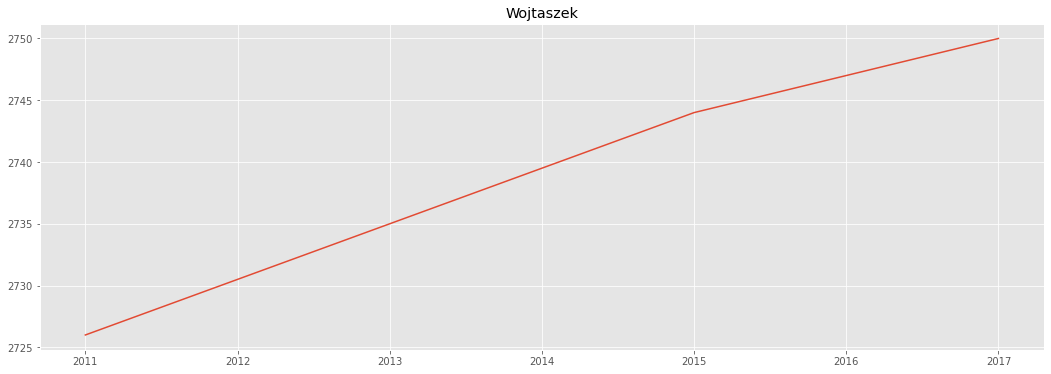

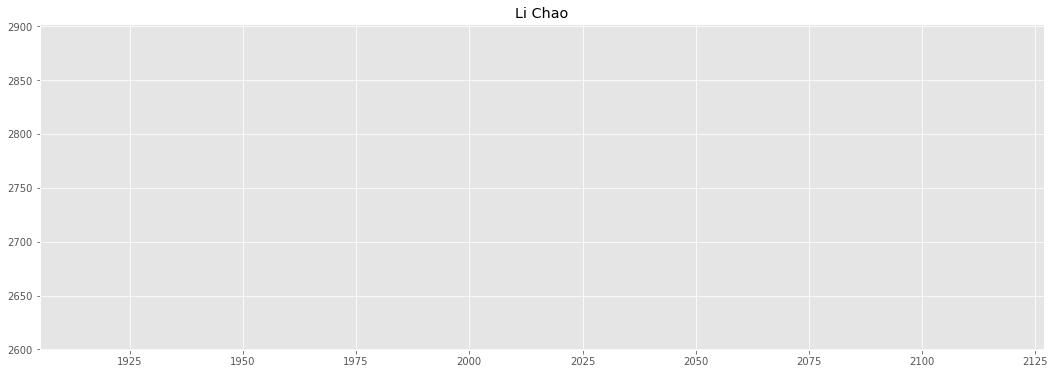

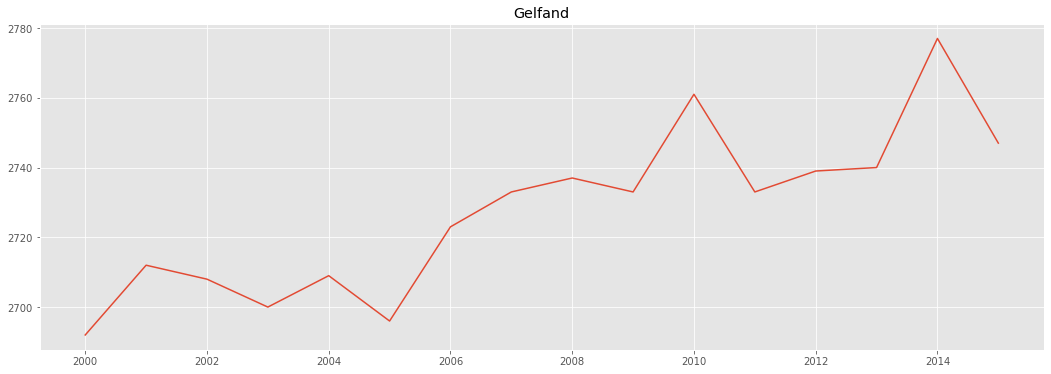

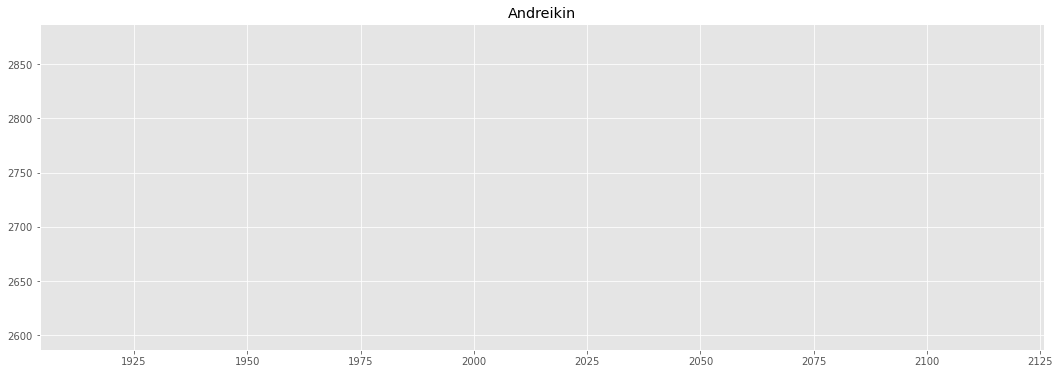

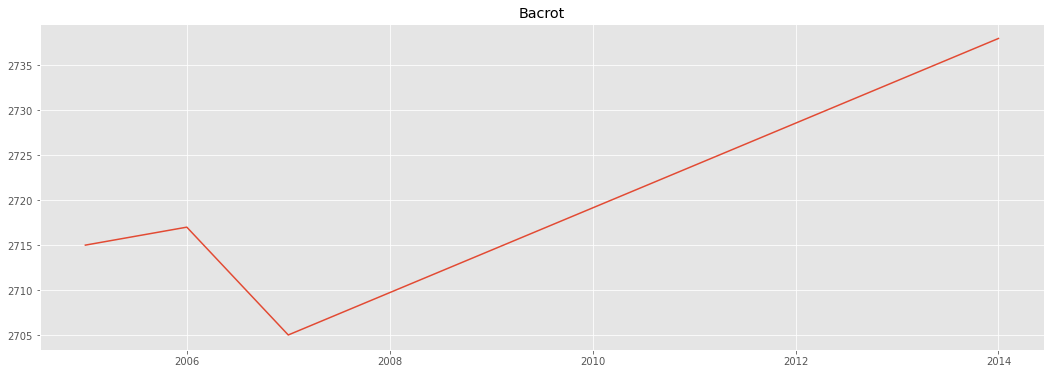

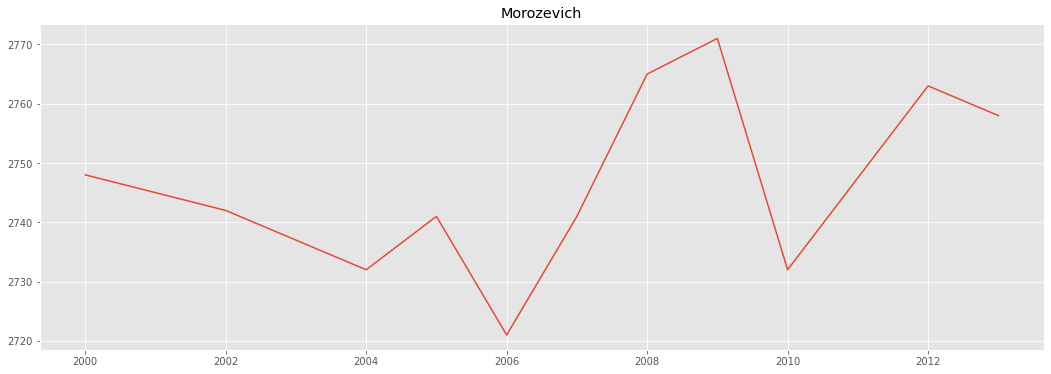

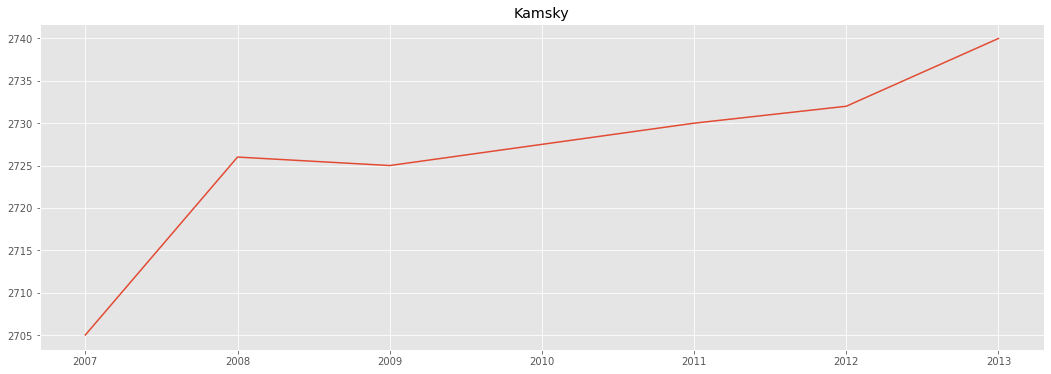

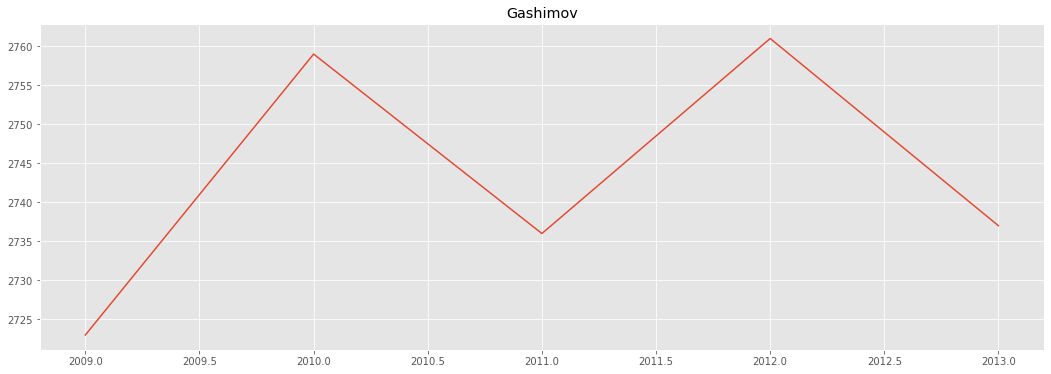

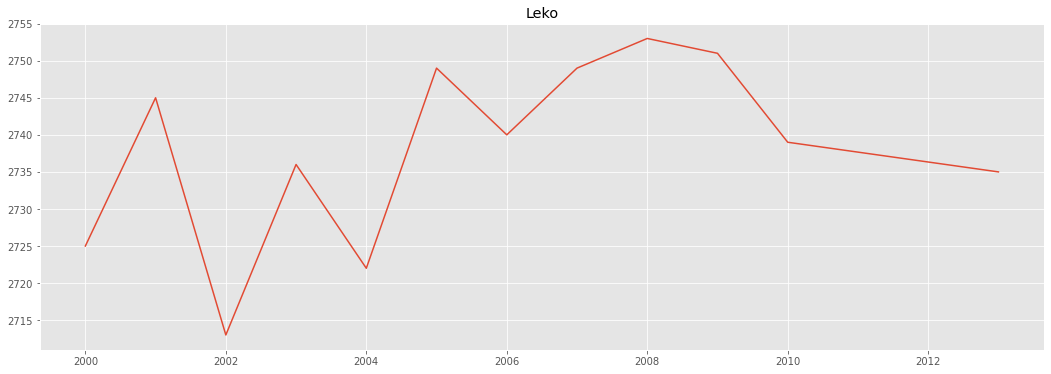

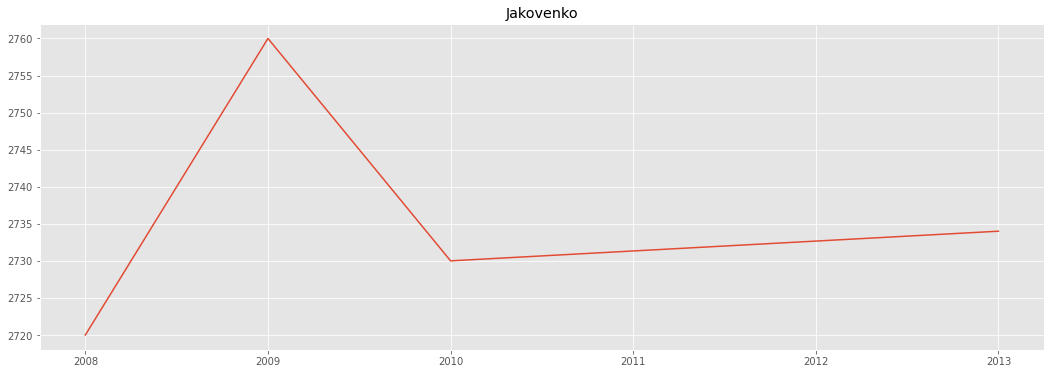

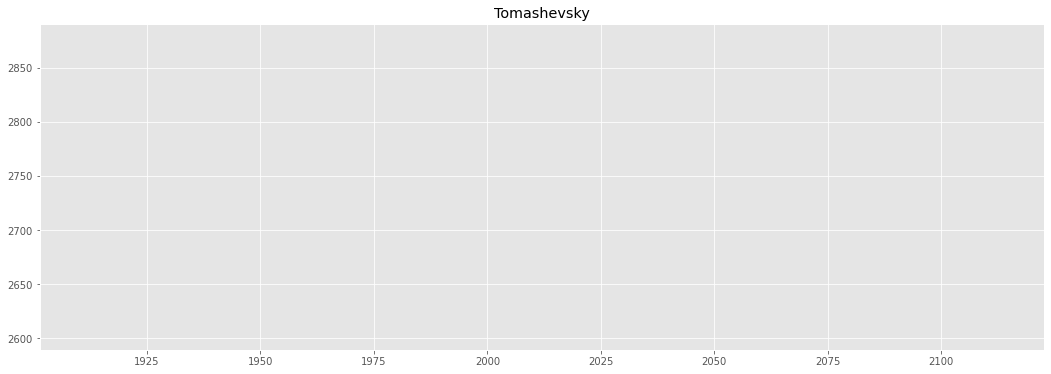

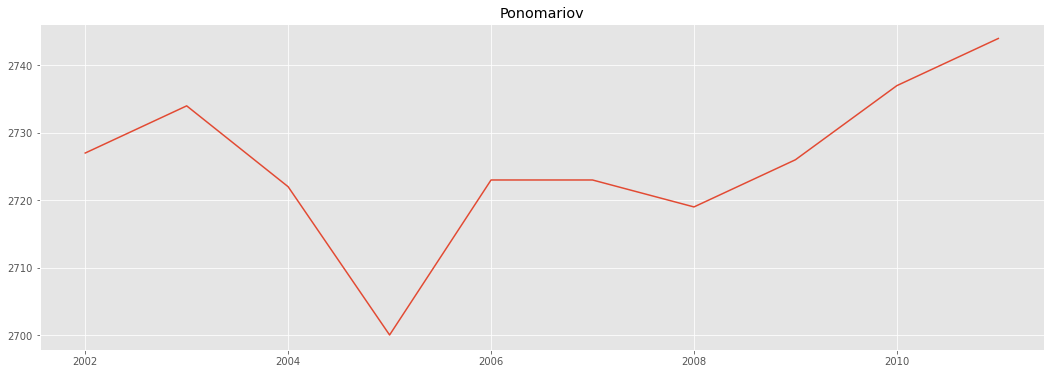

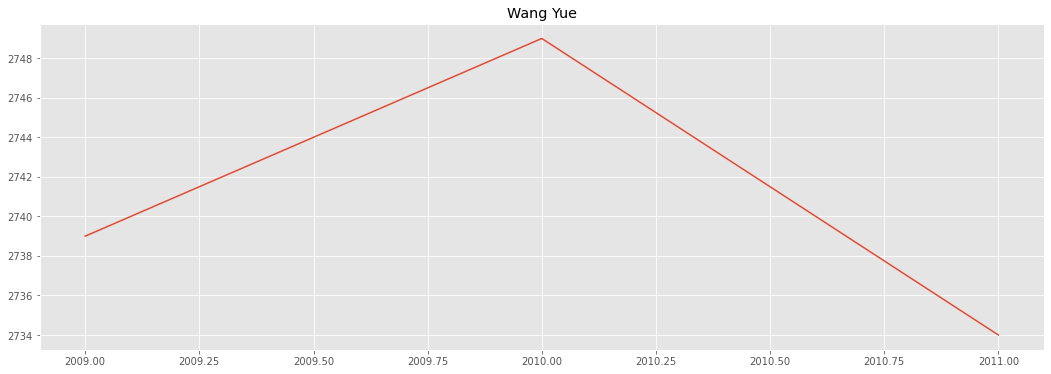

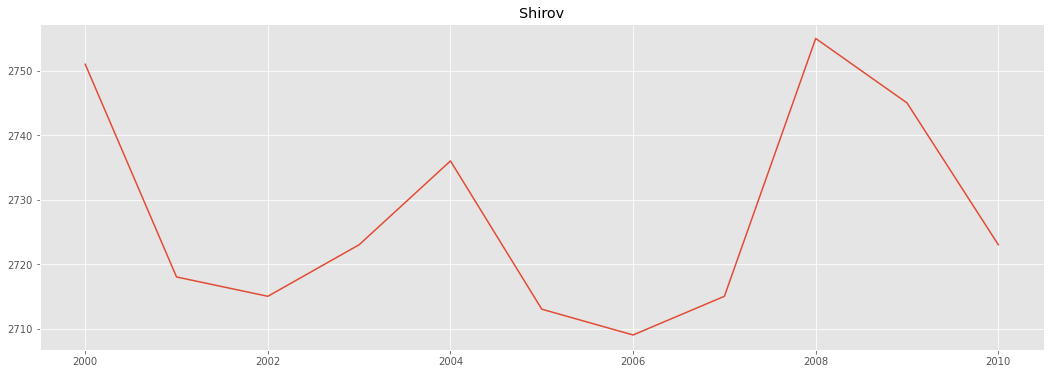

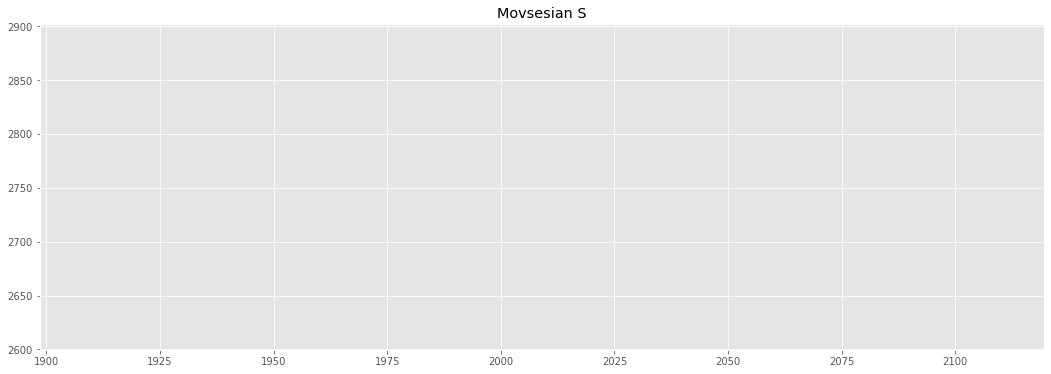

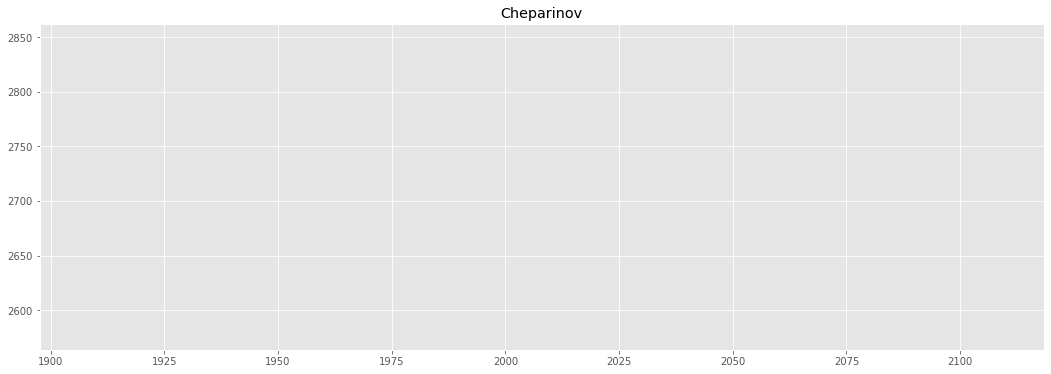

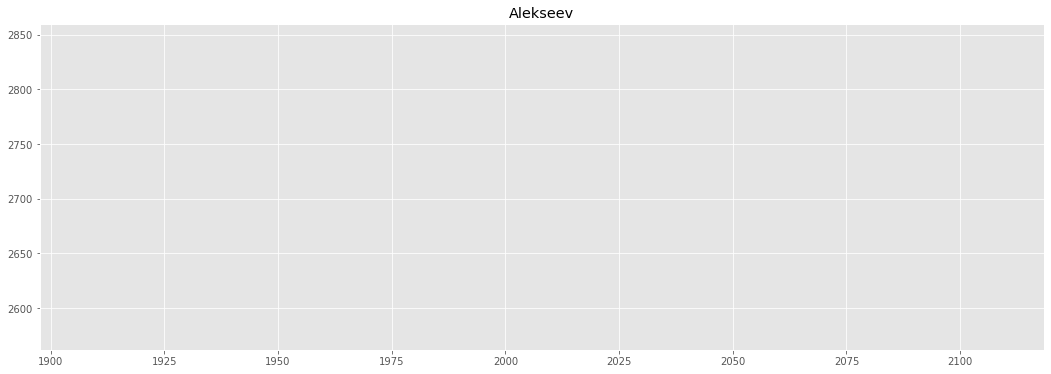

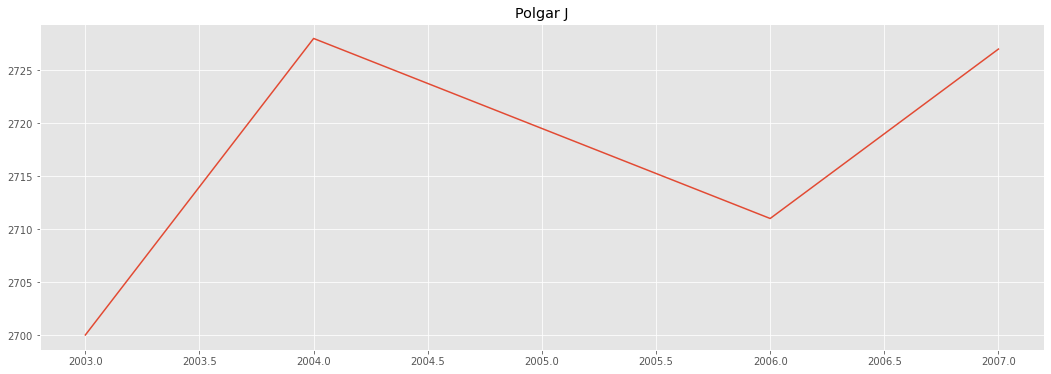

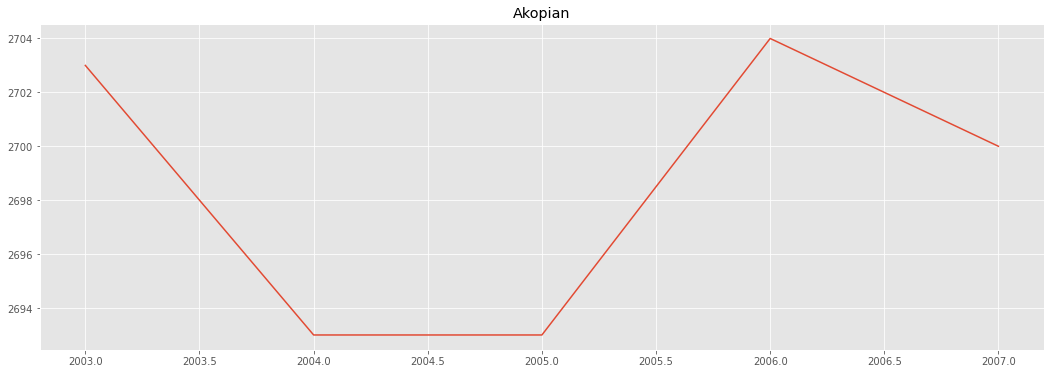

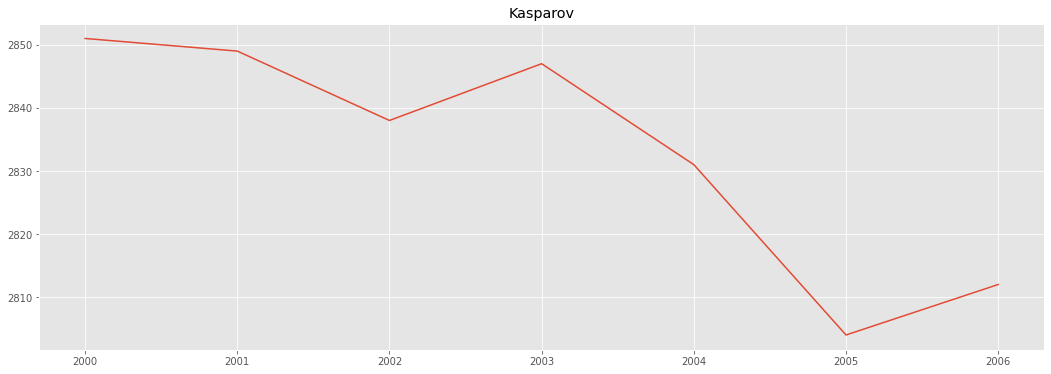

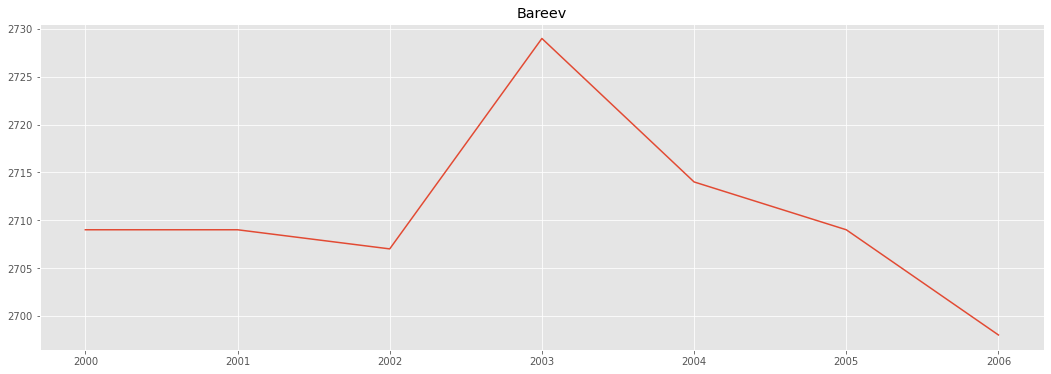

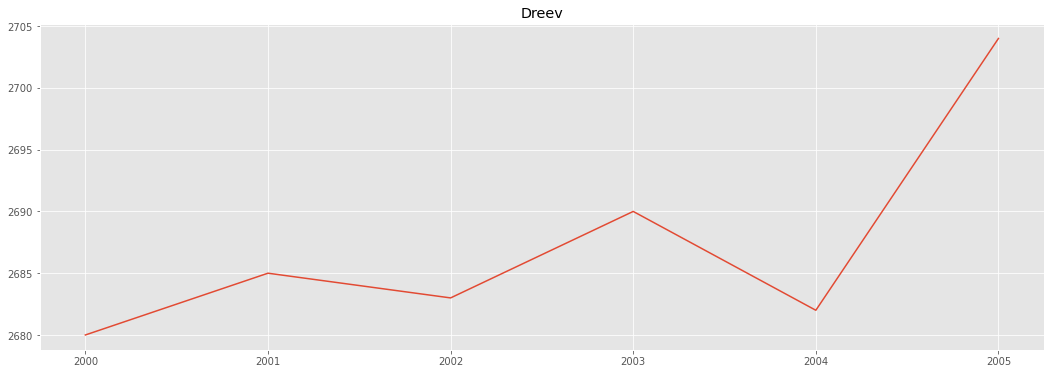

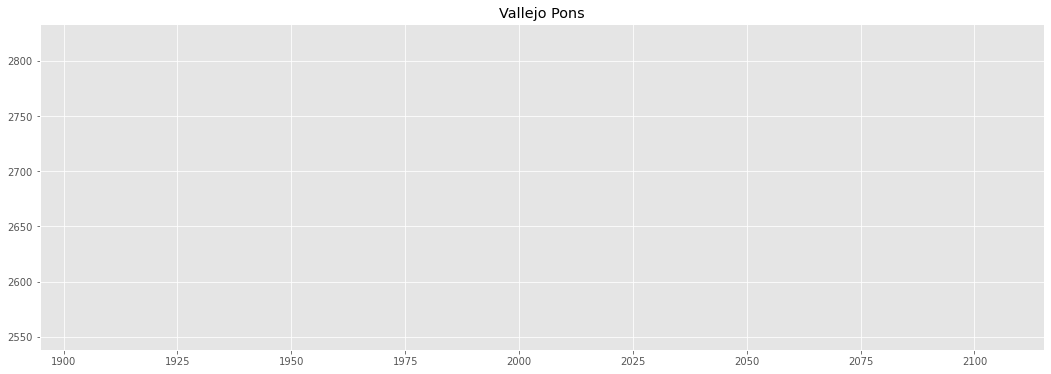

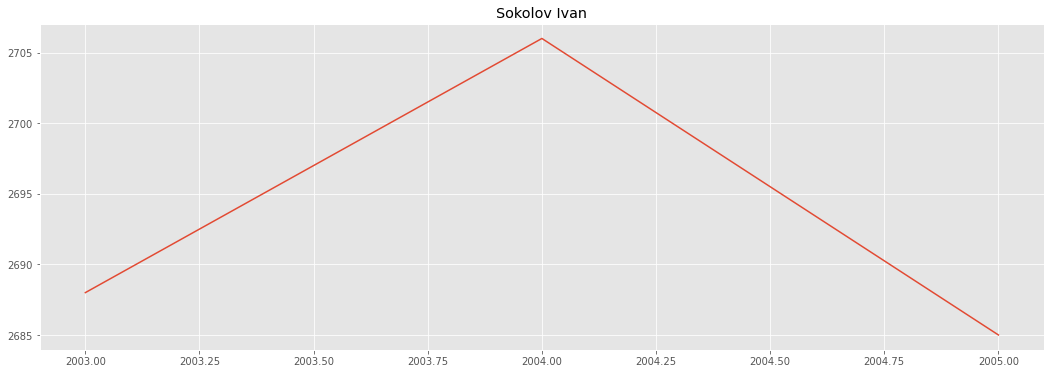

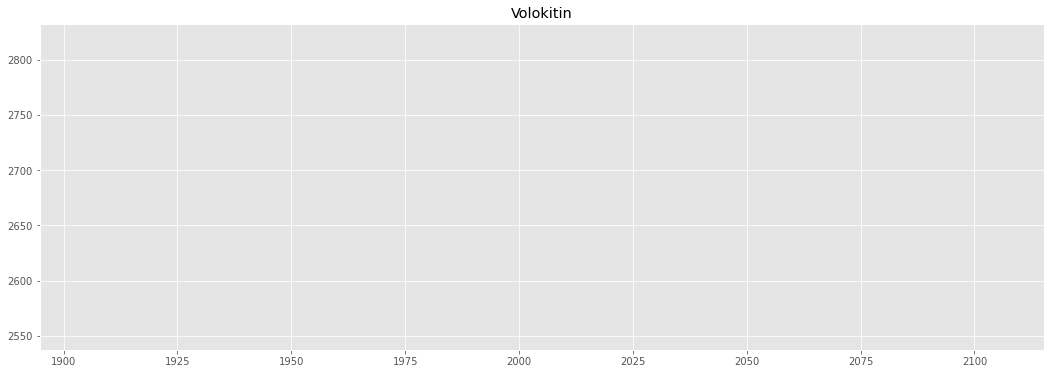

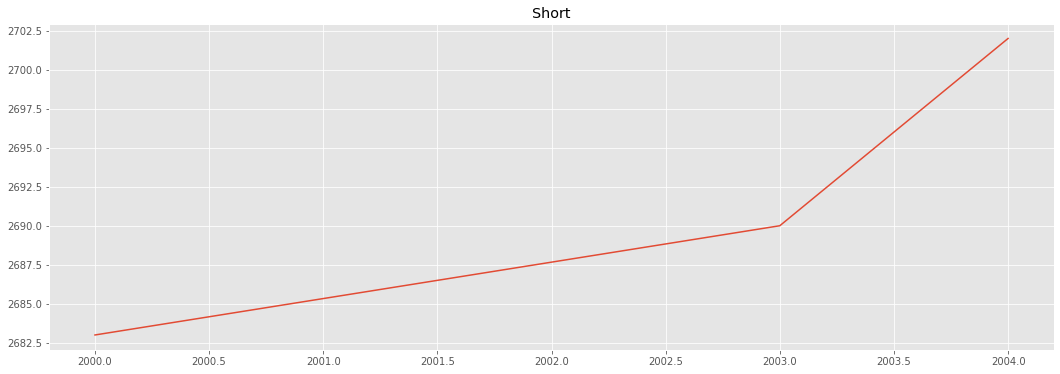

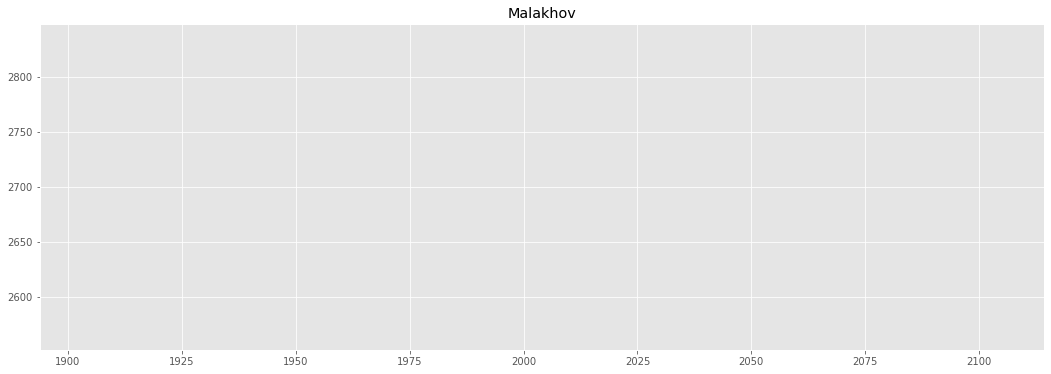

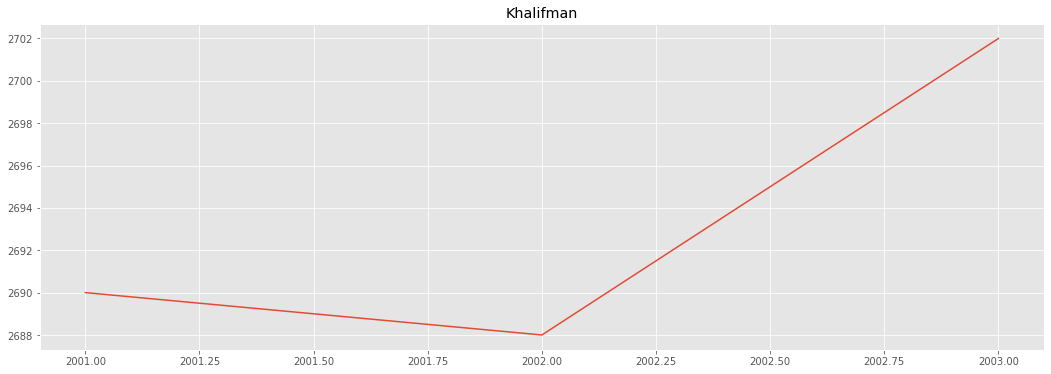

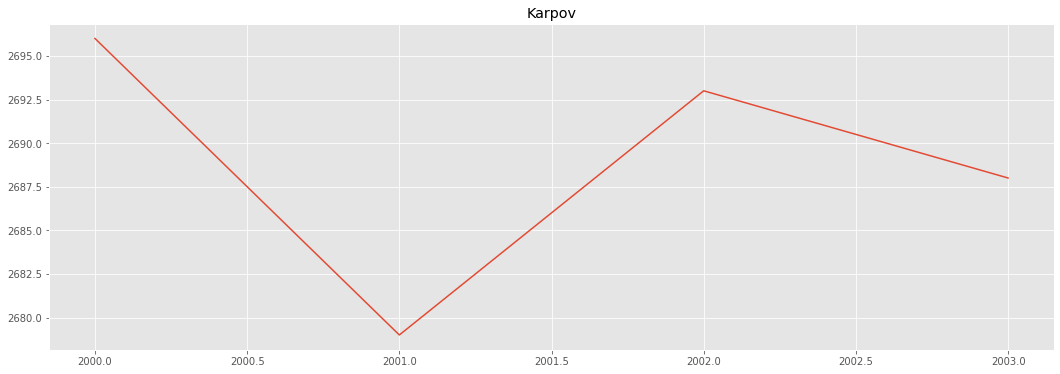

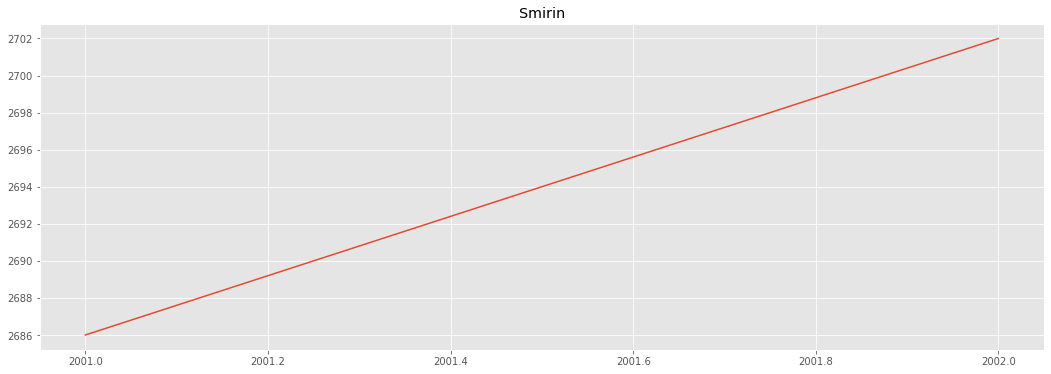

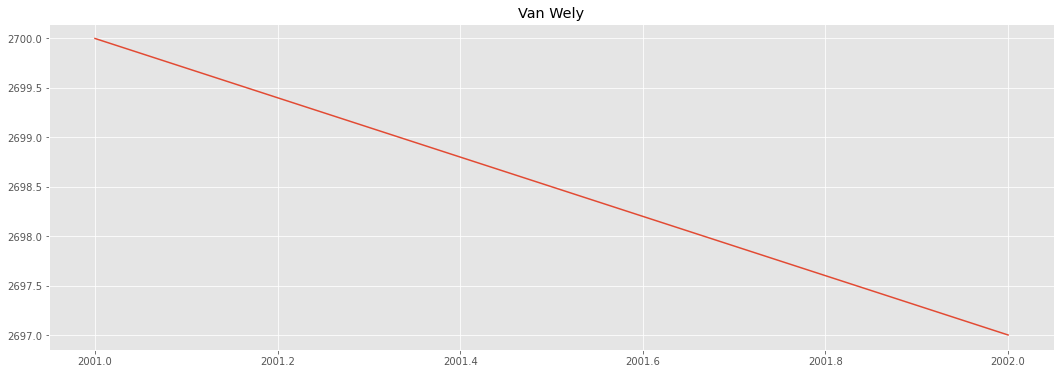

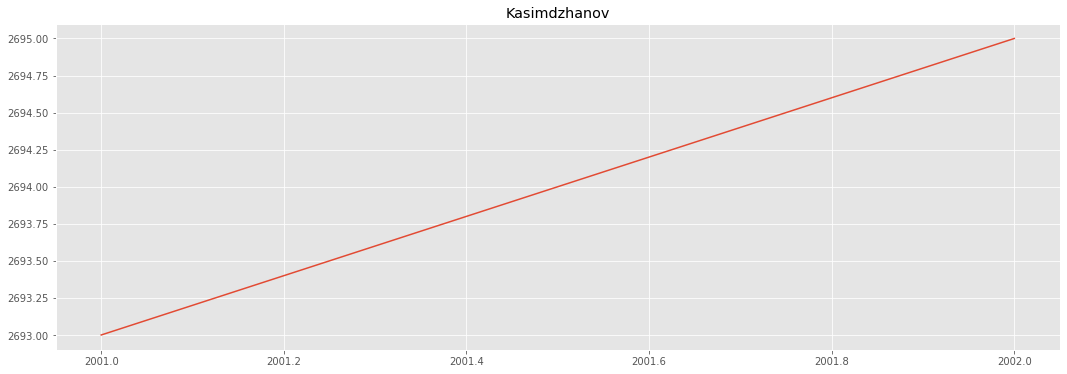

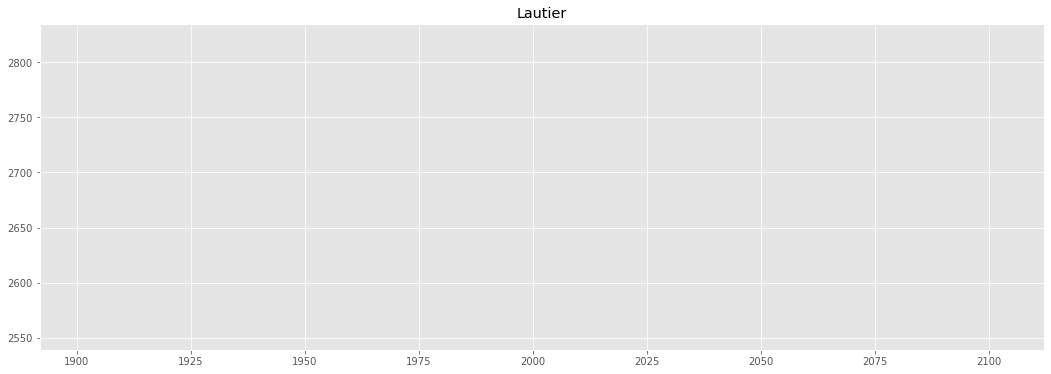

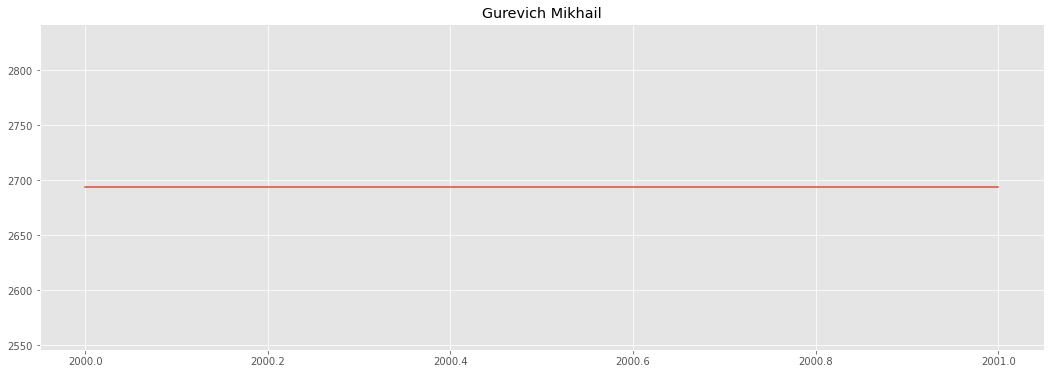

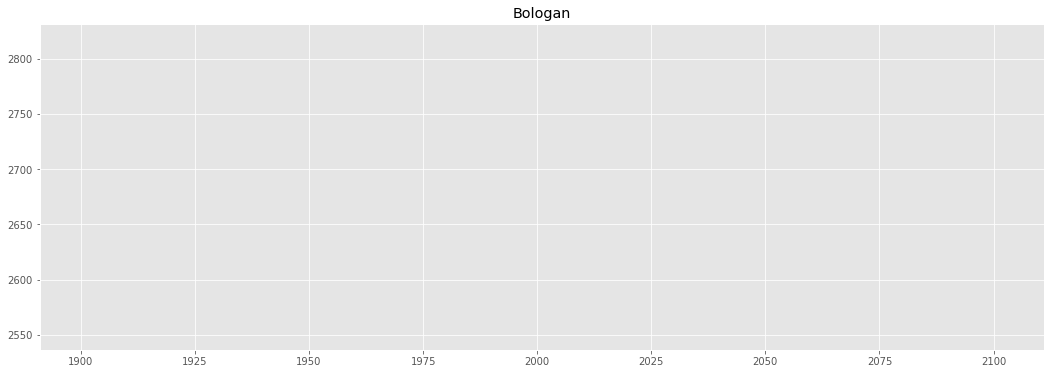

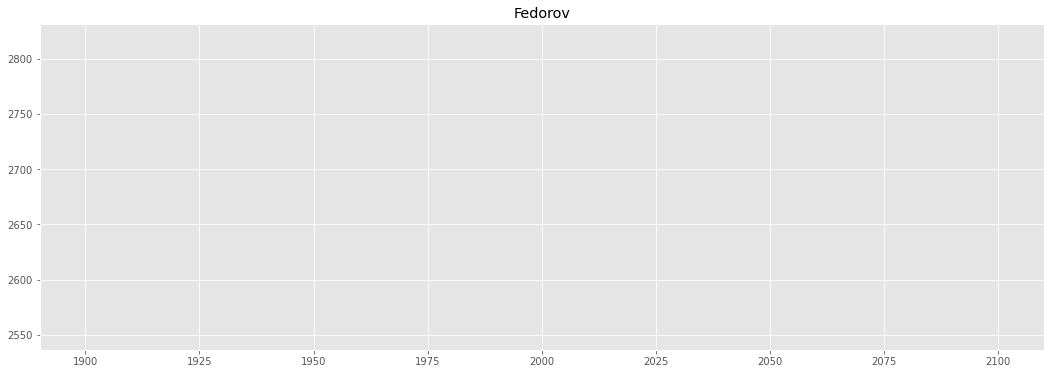

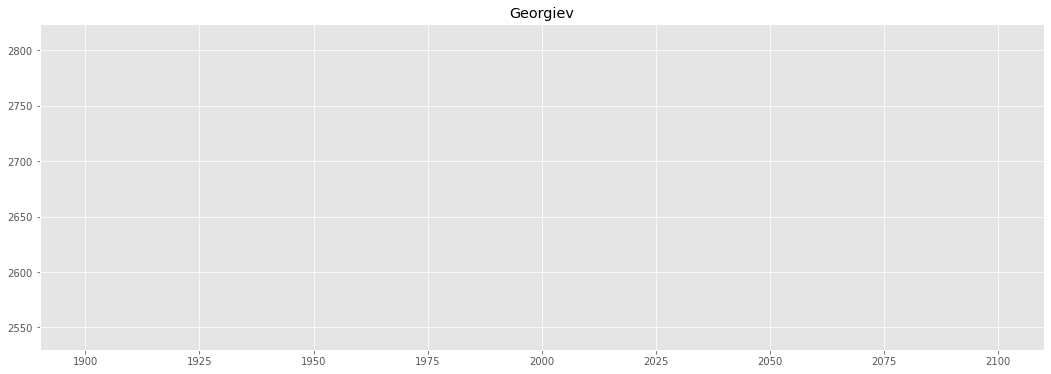

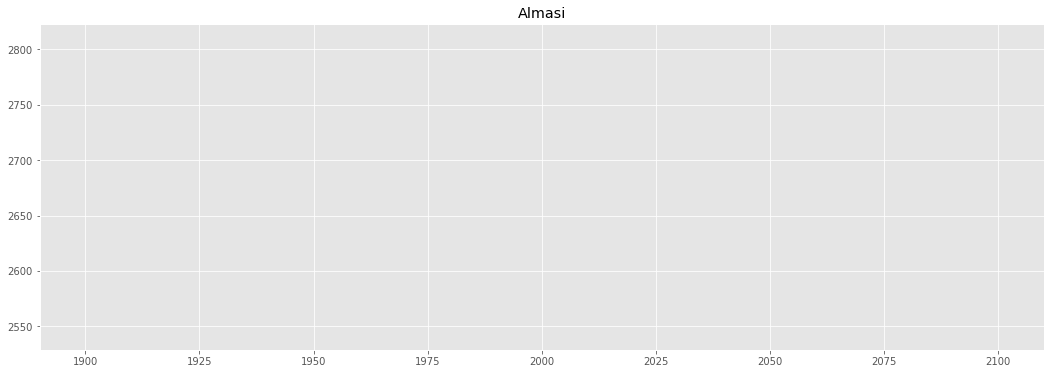

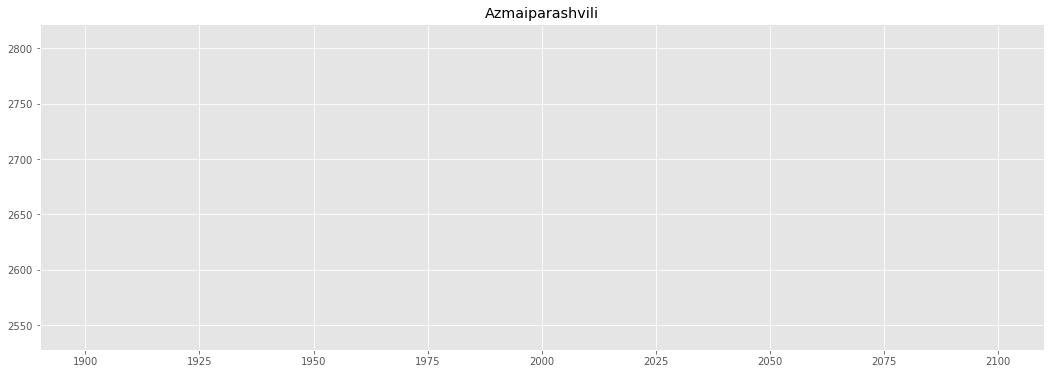

In [15]:
# Singular player trend over the years

for name in player_names:
    player_rows = df[df.Name == name]
    player_rows_sorted = player_rows.sort_values(by=['Year'])
    plt.figure(figsize=(18, 6))
    plt.plot(player_rows_sorted.Year,player_rows_sorted.ELO)
    plt.title(name)

As we can see, because the dataset doesn't always include the records of a player through all years, the plots vary in lines and even some plots lack any lines because there were only one record or two records for that player available on the dataset.

## 5. What's the minimum ELO of a player who ever appeared in top 20 ELOs? Who is this?

To find a minimum ELO in top 20 ELOs, we use `idxmin()` method which returns the index of the minimum value in the column. Then we use the `loc` keyword to access the record of that specific index:

In [16]:
top_20_elo = df.nlargest(20,'ELO')['ELO']
lowest_elo_row = df.loc[top_20_elo.idxmin()]
lowest_elo_row

Position (in January)           2
Name                      Caruana
ELO                          2820
Date                     2015 Jan
Age                            22
Year                         2015
Name: 121, dtype: object

In [17]:
name = lowest_elo_row['Name']
min_elo = lowest_elo_row['ELO']
print('The minimum ELO of a player in top 20 ELOs is %d and the name of player is %s. '%(min_elo,name))

The minimum ELO of a player in top 20 ELOs is 2820 and the name of player is Caruana. 


## 6. What's the average age of the players who were in the top 20 ELOs?

In [18]:
top_20_average_age = df.nlargest(20, 'ELO').Age.mean()

print(f'Average age of top 20 ELO players: {top_20_average_age:.2f}')

Average age of top 20 ELO players: 28.60


### 6.1. What's the time trend for the average age?

Text(0.5, 1.0, 'Average age time trend')

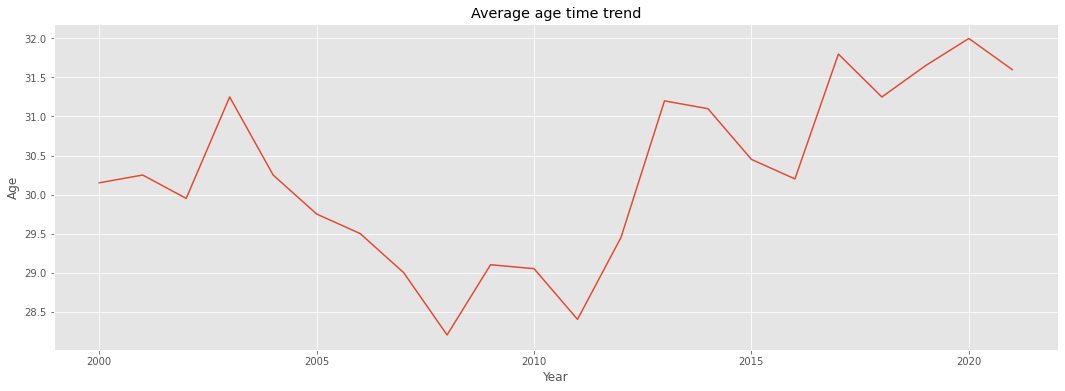

In [19]:
mean_age = df.groupby('Year')['Age'].mean()
# display(mean_age)
plt.figure(figsize=(18, 6))
plt.plot(mean_age);
plt.xlabel('Year')
plt.ylabel('Age')
plt.title('Average age time trend')

## 7. Who appeared most times in the top 20 ELOs?

In [20]:
df.nlargest(20, 'ELO')['Name'].value_counts()

Carlsen     10
Kasparov     5
Caruana      5
Name: Name, dtype: int64

## 8. What's the average age of peak performance of top 10 players?

We can use `nlargest` method to get the top 10 ELOs and calculate the average age of the players who had these ELOs:

In [21]:
average_age_top_10_players = df.nlargest(10, 'ELO')['Age'].mean()
print('The average age of top 10 players is: %.2f' %(average_age_top_10_players))

The average age of top 10 players is: 29.10


But this answer is not the correct one. To understand why, let's take a look at the top 10 ELOs: 

In [22]:
df.nlargest(10, 'ELO')

,Position (in January),Name,ELO,Date,Age,Year
20,1,Carlsen,2872,2020 Jan,29,2020
140,1,Carlsen,2872,2014 Jan,23,2014
0,1,Carlsen,2862,2021 Jan,30,2021
120,1,Carlsen,2862,2015 Jan,24,2015
160,1,Carlsen,2861,2013 Jan,22,2013
420,1,Kasparov,2851,2000 Jan,36,2000
400,1,Kasparov,2849,2001 Jan,37,2001
360,1,Kasparov,2847,2003 Jan,39,2003
100,1,Carlsen,2844,2016 Jan,25,2016
80,1,Carlsen,2840,2017 Jan,26,2017


As we can see, there are just 2 players (Carlsen and Kasparov) in top 10 ELOs and our answer `29.10` is average age of their age when they had those ELOs. This is why the answer is not correct.

To answer the question, first we need to find the top 10 players and to do that, we select `id` of the maximum ELO of players with `Groupby()` and `idxmax()`. We find ids in dataset. Afterthat, we select top 10 and use `mean()` to have average age of top 10 players:

In [23]:
players_top_elo_ids = df.groupby('Name')['ELO'].idxmax()

players_top_elos = df.loc[players_top_elo_ids]
average_age_top_10 = players_top_elos.nlargest(10,'ELO')['Age'].mean()
print('The average age of top 10 players is: %.2f' %(average_age_top_10))

The average age of top 10 players is: 31.70


We can see the top 10 players are the following:

In [24]:
players_top_elos.nlargest(10,'ELO')

,Position (in January),Name,ELO,Date,Age,Year
20,1,Carlsen,2872,2020 Jan,29,2020
420,1,Kasparov,2851,2000 Jan,36,2000
41,2,Caruana,2828,2019 Jan,26,2019
42,3,Mamedyarov,2817,2019 Jan,33,2019
43,4,Ding Liren,2813,2019 Jan,26,2019
141,2,Aronian,2812,2014 Jan,31,2014
82,3,Kramnik,2811,2017 Jan,41,2017
201,2,Anand,2810,2011 Jan,41,2011
122,3,Grischuk,2810,2015 Jan,31,2015
83,4,So,2808,2017 Jan,23,2017
